<a href="https://colab.research.google.com/github/ljs7463/AnalysisProject/blob/master/%EC%BD%94%EB%93%9C%EC%8A%A4%ED%85%8C%EC%9D%B4%EC%B8%A0%20%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8/Section2(%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D)/Sales%20analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 분석의 목적
데이터를 통해 잘팔리고 인기있는 제품의 특징을 살펴보고 이를 비즈니스에 적용하기 위한 방안을 모색한다. 또한, 제품에 대한 실시간 데이터 가 들어왔을때 판매량을 예측할 수 있는 모델을 만든다.

# 데이터 분석

## 데이터 확인하기

In [265]:
# 데이터 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
main_df = pd.read_csv('/content/summer-products-with-rating-and-performance_2020-08.csv')
main_df 

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,8.0,10.0,1.0,9.0,0,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",white,M,50,Livraison standard,4,0,34,50,1.0,Quantité limitée !,CN,zgrdejia,zgrdejia,(568 notes),568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0,0,0,0,0,"Mini,womens dresses,Summer,Patchwork,fashion d...",green,XS,50,Livraison standard,2,0,41,50,1.0,Quantité limitée !,CN,SaraHouse,sarahouse,"83 % avis positifs (17,752 notes)",17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,4.0,2.0,0.0,3.0,0,0,0,0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",leopardprint,XS,1,Livraison standard,3,0,36,50,1.0,Quantité limitée !,CN,hxt520,hxt520,86 % avis positifs (295 notes),295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,119.0,87.0,42.0,36.0,0,0,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...",black,M,50,Livraison standard,2,0,41,50,NaN,NaN,CN,allenfan,allenfan,"(23,832 notes)",23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,4.0,2.0,2.0,6.0,0,0,0,0,"Summer,Plus Size,Lace,Casual pants,Bottom,pant...",yellow,S,1,Livraison standard,1,0,35,50,1.0,Quantité limitée !,CN,youngpeopleshop,happyhorses,"85 % avis positifs (14,482 notes)",14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568,Nouvelle Mode Femmes Bohême Pissenlit Imprimer...,New Fashion Women Bohemia Dandelion Print Tee ...,6.00,9,EUR,10000,1,4.08,1367,722.0,293.0,185.0,77.0,90.0,0,0,0,0,"bohemia,Plus Size,dandelionfloralprinted,short...",navyblue,S,50,Livraison standard,2,0,41,50,NaN,NaN,CN,cxuelin99126,cxuelin99126,"90 % avis positifs (5,316 notes)",5316,4.224605,5b507899ab577736508a0782,0,NaN,https://www.wish.com/c/5d5fadc99febd9356cbc52ee,https://contestimg.wish.com/api/webimage/5d5fa...,5d5fadc99febd9356cbc52ee,summer,2020-08
1569,10 couleurs femmes shorts d'été lacent ceintur...,10 Color Women Summe

In [266]:
# 데이터 정보 확인
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1573 non-null   object 
 1   title_orig                    1573 non-null   object 
 2   price                         1573 non-null   float64
 3   retail_price                  1573 non-null   int64  
 4   currency_buyer                1573 non-null   object 
 5   units_sold                    1573 non-null   int64  
 6   uses_ad_boosts                1573 non-null   int64  
 7   rating                        1573 non-null   float64
 8   rating_count                  1573 non-null   int64  
 9   rating_five_count             1528 non-null   float64
 10  rating_four_count             1528 non-null   float64
 11  rating_three_count            1528 non-null   float64
 12  rating_two_count              1528 non-null   float64
 13  rat

In [267]:
# 결측값 확인
main_df.isnull().sum()

title                              0
title_orig                         0
price                              0
retail_price                       0
currency_buyer                     0
units_sold                         0
uses_ad_boosts                     0
rating                             0
rating_count                       0
rating_five_count                 45
rating_four_count                 45
rating_three_count                45
rating_two_count                  45
rating_one_count                  45
badges_count                       0
badge_local_product                0
badge_product_quality              0
badge_fast_shipping                0
tags                               0
product_color                     41
product_variation_size_id         14
product_variation_inventory        0
shipping_option_name               0
shipping_option_price              0
shipping_is_express                0
countries_shipped_to               0
inventory_total                    0
h

In [268]:
# 데이터 집계 확인
main_df.describe(include='all')

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
count,1573,1573,1573.000000,1573.000000,1573,1573.000000,1573.000000,1573.000000,1573.000000,1528.000000,1528.000000,1528.000000,1528.000000,1528.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573,1532,1559,1573.000000,1573,1573.000000,1573.000000,1573.000000,1573.000000,473.0,473,1556,1573,1569,1572,1.573000e+03,1573.000000,1573,1573.000000,226,1573,1573,1573,1573,1573
unique,1201,1203,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1230,101,106,NaN,15,NaN,NaN,NaN,NaN,NaN,2,6,958,957,1058,NaN,NaN,958,NaN,125,1341,1341,1341,1,1
top,Nouvelle mode d'été femmes robe décontractée c...,New Fashion Summer Women Casual Dress Round Ne...,NaN,NaN,EUR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Summer,Fashion,Necks,Skirts,Dress,Loose,Women'...",black,S,NaN,Livraison standard,NaN,NaN,NaN,NaN,NaN,Quantité limitée !,CN,guangzhouweishiweifushiyouxiangongsi,广州唯适唯服饰有限公司,"83 % avis positifs (32,168 notes)",NaN,NaN,558c2cdc89d53c4005ea2920,NaN,https://s3-us-west-1.amazonaws.com/sweeper-pro...,https://www.wish.com/c/5eb4f323b67a8d189a8f8380,https://contestimg.wish.com/api/webimage/5eaa6...,5eaa6d9c8d99eb3ec06709f4,summer,2020-08
freq,24,24,NaN,NaN,1573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,302,641,NaN,1508,NaN,NaN,NaN,NaN,NaN,472,1516,15,15,14,NaN,NaN,15,NaN,12,3,3,3,1573,1573
mean,NaN,NaN,8.325372,23.288620,NaN,4339.005086,0.432931,3.820896,889.659250,442.263743,179.599476,134.549738,63.711387,95.735602,0.105531,0.018436,0.074380,0.012715,NaN,NaN,NaN,33.081373,NaN,2.345200,0.002543,40.456453,49.821360,1.0,NaN,NaN,NaN,NaN,NaN,2.649583e+04,4.032345,NaN,0.143675,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,3.932030,30.357863,NaN,9356.539302,0.495639,0.515374,1983.928834,980.203270,400.516231,311.690656,151.343933,214.075544,0.340709,0.134565,0.262472,0.112075,NaN,NaN,NaN,21.353137,NaN,1.024371,0.050379,20.301203,2.562799,0.0,NaN,NaN,NaN,NaN,NaN,7.847446e+04,0.204768,NaN,0.350871,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,1.000000,NaN,1.000000,0.000000,6.000000,1.000000,1.0,NaN,NaN,NaN,NaN,NaN,0.000000e+00,2.333333,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,5.810000,7.000000,NaN,100.000000,0.000000,3.550000,24.000000,12.000000,5.000000,4.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,6.000000,NaN,2.000000,0.000000,31.000000,50.000000,1.0,NaN,NaN,NaN,NaN,NaN,1.987000e+03,3.917353,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,8.000000,10.000000,NaN,1000.000000,0.000000,3.850000,150.000000,79.000000,31.500000,24.000000,11.000000,20.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,50.000000,NaN,2.000000,0.000000,40.000000,50.000000,1.0,NaN,NaN,NaN,NaN,NaN,7.936000e+03,4.040650,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,11.000000,26.000000,NaN,5000.000000,1.000000,4.110000,855.000000,413.500000,168.250000,129.250000,62.000000,94.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,50.000000,NaN,3.000000,0.000000,43.000000,50.000000,1.0,NaN,NaN,NaN,NaN,NaN,2.456400e+04,4.161797,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [269]:
# 필요없는 데이터 제거 
df = main_df.copy()
df = df.drop(columns = ['title', 'currency_buyer', 'product_color', 'crawl_month', 'theme', 'product_url', 'product_picture','merchant_profile_picture', 'product_variation_size_id'])
df

,title_orig,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,product_id
0,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,100,0,3.76,54,26.0,8.0,10.0,1.0,9.0,0,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",50,Livraison standard,4,0,34,50,1.0,Quantité limitée !,CN,zgrdejia,zgrdejia,(568 notes),568,4.128521,595097d6a26f6e070cb878d1,0,5e9ae51d43d6a96e303acdb0
1,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,20000,1,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0,0,0,0,0,"Mini,womens dresses,Summer,Patchwork,fashion d...",50,Livraison standard,2,0,41,50,1.0,Quantité limitée !,CN,SaraHouse,sarahouse,"83 % avis positifs (17,752 notes)",17752,3.899673,56458aa03a698c35c9050988,0,58940d436a0d3d5da4e95a38
2,2020 New Arrival Women Spring and Summer Beach...,8.00,43,100,0,3.57,14,5.0,4.0,2.0,0.0,3.0,0,0,0,0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",1,Livraison standard,3,0,36,50,1.0,Quantité limitée !,CN,hxt520,hxt520,86 % avis positifs (295 notes),295,3.989831,5d464a1ffdf7bc44ee933c65,0,5ea10e2c617580260d55310a
3,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,5000,1,4.03,579,295.0,119.0,87.0,42.0,36.0,0,0,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...",50,Livraison standard,2,0,41,50,NaN,NaN,CN,allenfan,allenfan,"(23,832 notes)",23832,4.020435,58cfdefdacb37b556efdff7c,0,5cedf17ad1d44c52c59e4aca
4,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,100,1,3.10,20,6.0,4.0,2.0,2.0,6.0,0,0,0,0,"Summer,Plus Size,Lace,Casual pants,Bottom,pant...",1,Livraison standard,1,0,35,50,1.0,Quantité limitée !,CN,youngpeopleshop,happyhorses,"85 % avis positifs (14,482 notes)",14482,4.001588,5ab3b592c3911a095ad5dadb,0,5ebf5819ebac372b070b0e70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568,New Fashion Women Bohemia Dandelion Print Tee ...,6.00,9,10000,1,4.08,1367,722.0,293.0,185.0,77.0,90.0,0,0,0,0,"bohemia,Plus Size,dandelionfloralprinted,short...",50,Livraison standard,2,0,41,50,NaN,NaN,CN,cxuelin99126,cxuelin99126,"90 % avis positifs (5,316 notes)",5316,4.224605,5b507899ab577736508a0782,0,5d5fadc99febd9356cbc52ee
1569,10 Color Women Summer Shorts Lace Up Elastic W...,2.00,56,100,1,3.07,28,11.0,3.0,1.0,3.0,10.0,0,0,0,0,"Summer,Panties,Elastic,Lace,Casual pants,casua...",2,Livraison standard,1,0,26,50,1.0,Quantité limitée !,CN,sell best quality goods,sellbestqualitygoods,"(4,435 notes)",4435,3.696054,54d83b6b6b8a771e478558de,0,5eccd22b4497b86fd48f16b4
1570,New Men Siwmwear Beach-Shorts Men Summer Quick...,5.00,19,100,0,3.71,59,24.0,15.0,8.0,3.0,9.0,0,0,0,0,"runningshort,Beach Shorts,beachpant,menbeachsh...",15,Livraison standard,2,0,11,50,NaN,NaN,CN,shixueying,shixueying,86 % avis positifs (210 notes),210,3.961905,5b42da1bf64320209fc8da69,0,5e74be96034d613d42b52dfe
1571,Fashion Women Summer Sleeveless Dresses V Neck...,13.00,11,100,0,2.50,2,0.0,1.0,0.0,0.0,1.0,0,0,0,0,"Summer,fashion women,Fashion,Lace,Dresses,Dres...",36,Livraison standard,3,0,29,50,NaN,NaN,CN,modai,modai,77 % avis positifs (31 notes),31,3.774194,5d56b32c40defd78043d5af9,0,5eda07ab0e295c2097c36590


In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title_orig                    1573 non-null   object 
 1   price                         1573 non-null   float64
 2   retail_price                  1573 non-null   int64  
 3   units_sold                    1573 non-null   int64  
 4   uses_ad_boosts                1573 non-null   int64  
 5   rating                        1573 non-null   float64
 6   rating_count                  1573 non-null   int64  
 7   rating_five_count             1528 non-null   float64
 8   rating_four_count             1528 non-null   float64
 9   rating_three_count            1528 non-null   float64
 10  rating_two_count              1528 non-null   float64
 11  rating_one_count              1528 non-null   float64
 12  badges_count                  1573 non-null   int64  
 13  bad

In [271]:
df.isnull().sum()

title_orig                         0
price                              0
retail_price                       0
units_sold                         0
uses_ad_boosts                     0
rating                             0
rating_count                       0
rating_five_count                 45
rating_four_count                 45
rating_three_count                45
rating_two_count                  45
rating_one_count                  45
badges_count                       0
badge_local_product                0
badge_product_quality              0
badge_fast_shipping                0
tags                               0
product_variation_inventory        0
shipping_option_name               0
shipping_option_price              0
shipping_is_express                0
countries_shipped_to               0
inventory_total                    0
has_urgency_banner              1100
urgency_text                    1100
origin_country                    17
merchant_title                     0
m

데이터 종류 확인

***Nominal*** : uses_ad_boosts(추가 광고 집행여부)/ badge_local_product/ badge_product_quality/ badge_fast_shipping/ shipping_is_express/ has_urgency_banner/ origin_country/ merchant_has_profile_picture/merchant_profile_picture/


***Ordinal*** : badges_count(뱃지 수)/product_variation_size_id/

***Continuous***  : Price(가격)/ retail_price(소매가격)/ rating(등급비율평균)/ merchant_rating/

***Discrete*** : units_sold(판매량)/ rating_count/ shipping_option_price/ (rating_five_count~rating_one_count)/ product_variation_inventory/ countries_shipped_to/ inventory_total/ merchant_rating_count/ 

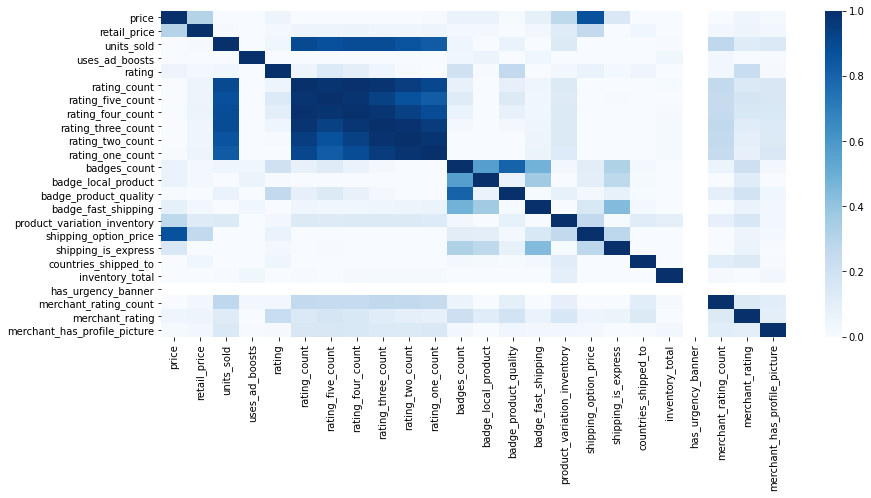

In [272]:
# raw데이터 상관관계 확인해보기
plt.figure(figsize = (14, 6))
sns.heatmap(df.corr(), vmin = 0, vmax =1,cmap = 'Blues')

- 1.판매량과 상품평가등급과 높은 상관관계를 보인다.
- 2.배송비와 가격과 높은 상관관계를 보인다
- 3.판매자 평가수와 판매량과도 상관관계를 보인다
- 4.가격이 높을수록 배송비가 높은 경향을 보이는 것 같다.

## 결측값 처리하기

- 1. 평점 등급 5개 결측값 처리하기

In [273]:
# 결측값 데이터가 모두 같은 데이터에 포함되어있으며 rating_count가 0이라는것을 알아내고 확인해본 결과
df[df['rating_count']==0]

,title_orig,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,product_id
74,Fashion Women Sleeveless Lace Vest Loose V Nec...,8.00,33,10,0,5.0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,"Vest,Fashion,Lace,V-neck,Women's Fashion,laceb...",50,Livraison standard,2,0,25,50,NaN,NaN,CN,WSLCWM,wslcwm,"88 % avis positifs (1,496 notes)",1496,4.169786,592955ef980a346d826f7bfc,0,5ed0dfc51fa8446451b19c0d
112,Womens Summer Fashion Lip Print 2pc Set Ladies...,5.00,51,10,0,5.0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,"Summer,Shorts,Shirt,Sleeve,sportsset,short sle...",1,Livraison standard,1,0,36,50,NaN,NaN,CN,hxt520,hxt520,86 % avis positifs (295 notes),295,3.989831,5d464a1ffdf7bc44ee933c65,0,5eb90ab5ad67f63678d15ed9
126,Women's Casual Sleeveless Stripe T Shirts Dres...,2.72,9,1,0,5.0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,"Summer,Plus Size,Shirt,long dress,Dress,Women'...",1,Livraison standard,1,0,33,50,NaN,NaN,CN,Kyiswen,kyiswen,75 % avis positifs (378 notes),378,3.597884,5d417e7070327a2743021677,0,5ed3ae8e7bf8821d5cf4bc64
189,Women's Active Skort Athletic Stretchy Pleated...,5.00,5,10,0,5.0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,"ladies skort,running skirt,summer skirt,Golf,s...",50,Livraison standard,2,0,8,50,1.0,Quantité limitée !,CN,renpingping,renpingping,80 % avis positifs (129 notes),129,3.837209,5a3231f2e62bbc45b0bda1dd,0,5ed1c059630f990d1d44592c
216,Women's Sexy Push Up Bikini Vintage Set Sexy B...,11.00,30,10,0,5.0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,"woman fashion,Fashion,outside,Vintage,sexy bik...",50,Livraison standard,3,0,78,50,1.0,Quantité limitée !,CN,YIWU SHI AO HANG DIAN ZI SHANG WU YOU XIAN GON...,yiwushiaohangdianzishangwuyouxiangongsi,"91 % avis positifs (22,621 notes)",22621,4.295124,56025ed8293a5b2d24779bde,0,573db9316b335c34ca0513b8
248,Summer Fashion Tie-Dye Short Sleeve Long Dress...,8.00,9,7,0,5.0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,"Summer,summer dress,Necks,Sleeve,long dress,pl...",5,Livraison standard,3,0,38,50,NaN,NaN,CN,"SHENZHEN LONGDRAGON TECHNOLOGY CO.,LTD",shenzhenlongdragontechnologycoltd,"87 % avis positifs (108,048 notes)",108048,4.052504,5417aada4ad3ab27e954b76c,1,5e8d70549f1504449514c8b9
309,Ladies Summer Tie Dye Print Short Sleeve Off S...,4.81,5,100,1,5.0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,"Summer,Plus Size,Tie Dye,tiedyeprint,Dyes,Dres...",5,Envio Padrão,1,0,47,50,1.0,Quantité limitée !,CN,chaoyang_lizhen,chaoyang_lizhen,83% Feedback positivo (6 classificações),6,4.333333,5e5f6272d0e9af054214467e,0,5edda5aeb7160e568443c6e7
346,2020 New Women Summer Fashion O-neck Sleevele...,8.00,7,10,1,5.0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,"Summer,Slim Fitting,Tank,summer tank top,Tops...",50,Livraison standard,3,0,10,50,NaN,NaN,CN,longming,longming,"85 % avis positifs (27,175 notes)",27175,3.966035,58a99ceca65ebc504a6ebf1e,0,5eccb8aa18e87d64f13e012c
348,Women Summer Fashion Cotton Overalls Sleeveles...,11.00,30,1,0,5.0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,"Summer,Fashion,Cotton,Casual pants,rompersforw...",10,Livraison standard,2,0,33,50,NaN,NaN,CN,caogao,caogao,"(1,380 notes)",1380,4.007246,5d4b8931933fb13f8a1fe232,0,5ebfdd5bebac37702b0b207b
375,Vintage Kawaii Harajuku T Shirt Women Ullzang ...,8.00,17,10,0,5.0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,"90sfashion,Summer,Fashion,Princess,cute,Kawaii...",50,Livraison standard,3,0,48,50,1.0,Quantité limitée !,CN,WenqiaoyouuOO,wenqiaoyouuoo,75 % avis positifs (8 notes),8,3.625000,5df1cd2ecce7510b506fdba5,0,5ec48b4f504db2c516aad131


상품의 평가등급은 판매량예측에 있어서 가장 중요한 요소가 되므로 결측값 처리에 신중을 요한다. 하지만, 상인의 평가 수 를 제외하면 유추할 만한 데이터가 없으며, 
이 또한 상관관계가 상대적으로 높을 뿐 1대1로 예측하는데 적합하지 않으므로 45개의 데이터를 삭제 하기로 결정

In [274]:
# mask를 활용하여 등급평가 결측값 제거하기
mask =df['rating_count']==0
df = df[~mask]
df

,title_orig,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,product_id
0,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,100,0,3.76,54,26.0,8.0,10.0,1.0,9.0,0,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",50,Livraison standard,4,0,34,50,1.0,Quantité limitée !,CN,zgrdejia,zgrdejia,(568 notes),568,4.128521,595097d6a26f6e070cb878d1,0,5e9ae51d43d6a96e303acdb0
1,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,20000,1,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0,0,0,0,0,"Mini,womens dresses,Summer,Patchwork,fashion d...",50,Livraison standard,2,0,41,50,1.0,Quantité limitée !,CN,SaraHouse,sarahouse,"83 % avis positifs (17,752 notes)",17752,3.899673,56458aa03a698c35c9050988,0,58940d436a0d3d5da4e95a38
2,2020 New Arrival Women Spring and Summer Beach...,8.00,43,100,0,3.57,14,5.0,4.0,2.0,0.0,3.0,0,0,0,0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",1,Livraison standard,3,0,36,50,1.0,Quantité limitée !,CN,hxt520,hxt520,86 % avis positifs (295 notes),295,3.989831,5d464a1ffdf7bc44ee933c65,0,5ea10e2c617580260d55310a
3,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,5000,1,4.03,579,295.0,119.0,87.0,42.0,36.0,0,0,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...",50,Livraison standard,2,0,41,50,NaN,NaN,CN,allenfan,allenfan,"(23,832 notes)",23832,4.020435,58cfdefdacb37b556efdff7c,0,5cedf17ad1d44c52c59e4aca
4,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,100,1,3.10,20,6.0,4.0,2.0,2.0,6.0,0,0,0,0,"Summer,Plus Size,Lace,Casual pants,Bottom,pant...",1,Livraison standard,1,0,35,50,1.0,Quantité limitée !,CN,youngpeopleshop,happyhorses,"85 % avis positifs (14,482 notes)",14482,4.001588,5ab3b592c3911a095ad5dadb,0,5ebf5819ebac372b070b0e70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568,New Fashion Women Bohemia Dandelion Print Tee ...,6.00,9,10000,1,4.08,1367,722.0,293.0,185.0,77.0,90.0,0,0,0,0,"bohemia,Plus Size,dandelionfloralprinted,short...",50,Livraison standard,2,0,41,50,NaN,NaN,CN,cxuelin99126,cxuelin99126,"90 % avis positifs (5,316 notes)",5316,4.224605,5b507899ab577736508a0782,0,5d5fadc99febd9356cbc52ee
1569,10 Color Women Summer Shorts Lace Up Elastic W...,2.00,56,100,1,3.07,28,11.0,3.0,1.0,3.0,10.0,0,0,0,0,"Summer,Panties,Elastic,Lace,Casual pants,casua...",2,Livraison standard,1,0,26,50,1.0,Quantité limitée !,CN,sell best quality goods,sellbestqualitygoods,"(4,435 notes)",4435,3.696054,54d83b6b6b8a771e478558de,0,5eccd22b4497b86fd48f16b4
1570,New Men Siwmwear Beach-Shorts Men Summer Quick...,5.00,19,100,0,3.71,59,24.0,15.0,8.0,3.0,9.0,0,0,0,0,"runningshort,Beach Shorts,beachpant,menbeachsh...",15,Livraison standard,2,0,11,50,NaN,NaN,CN,shixueying,shixueying,86 % avis positifs (210 notes),210,3.961905,5b42da1bf64320209fc8da69,0,5e74be96034d613d42b52dfe
1571,Fashion Women Summer Sleeveless Dresses V Neck...,13.00,11,100,0,2.50,2,0.0,1.0,0.0,0.0,1.0,0,0,0,0,"Summer,fashion women,Fashion,Lace,Dresses,Dres...",36,Livraison standard,3,0,29,50,NaN,NaN,CN,modai,modai,77 % avis positifs (31 notes),31,3.774194,5d56b32c40defd78043d5af9,0,5eda07ab0e295c2097c36590


- 2. 원산지 결측값 처리하기

In [275]:
# 원산지 데이터 살펴보기
print('결측값 수 :',df['origin_country'].isnull().sum())
print('원산지 국가 :',df['origin_country'].unique())
print('비율 :', df['origin_country'].value_counts(normalize = True))

결측값 수 : 17
원산지 국가 : ['CN' 'US' nan 'VE' 'SG' 'GB']
비율 : CN    0.974189
US    0.020516
VE    0.003309
SG    0.001324
GB    0.000662
Name: origin_country, dtype: float64


In [276]:
# 97%를 차지하는 중국으로 결측값 채우기
df['origin_country'] = df['origin_country'].fillna('CN')
print('전처리 후 결측값 확인 :',df['origin_country'].isnull().sum())

전처리 후 결측값 확인 : 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


- 3. 판매자 이름 결측값 처리

In [277]:
# 판매자 이름 분포 살펴보기
df['merchant_name'].value_counts().head(30)

广州唯适唯服饰有限公司                              15
greatexpectationstechnology              12
sjhdstoer                                 9
sangboostore                              8
shuilingjiaointernationaltradecompany     8
cenicbeauty                               8
pentiumhorse                              7
smarthomeinternationalcoltd               6
hellohorse                                6
fengjinying                               6
snowgirl                                  6
sarahouse                                 6
sklioppp                                  6
zuilangmands                              6
citizenrepublk                            5
xiejiatang                                5
witkeybl                                  5
maxnina                                   5
f40051ab1zhong9                           5
龙飞凤舞                                      5
keepahorse                                5
luoweiclothe                              5
dududustore                     

판매자 이름 컬럼의 경우 하이커디널리티이며, 특정인물이 독점하지도 않는 모습을 나태내고 있다. 또한 예측을 하기에도 어렵고 결측 데이터가 4개에 불과하기 때문에 해당 데이터를 삭제할 것이다.

In [278]:
# 판매자 이름 결측지 제거
df = df.dropna(subset = ['merchant_name'], how = 'any', axis =0)

- 4. 긴급한 베너가 있는지여부, 검색결과와 일부 제품위에 나타나는 텍스트 베너 결측값 처리

urgency_text
- Quantité limitée : 수량한정
- Réduction sur les achats en gros : 도매 구매 할인

In [279]:
# 결측지가 아닌 모든 상품에 베너가 부착되어있음을 알 수 있다.
df['has_urgency_banner'].value_counts(normalize = True)

1.0    1.0
Name: has_urgency_banner, dtype: float64

In [280]:
# 긴급 베너 텍스트 확인
df['urgency_text']

0       Quantité limitée !
1       Quantité limitée !
2       Quantité limitée !
3                      NaN
4       Quantité limitée !
               ...        
1568                   NaN
1569    Quantité limitée !
1570                   NaN
1571                   NaN
1572                   NaN
Name: urgency_text, Length: 1524, dtype: object

In [281]:
df['urgency_text'].unique()

array(['Quantité limitée !', nan, 'Réduction sur les achats en gros'],
      dtype=object)

In [282]:
df['urgency_text'].value_counts(normalize = True)

Quantité limitée !                  0.997821
Réduction sur les achats en gros    0.002179
Name: urgency_text, dtype: float64

모든 상품에 베너가 붙어있으며 99.7%는 한정슈량 베너이며, 0.03%는 도매 구매 할인 베너이다. 모든상품에 부착되어있으면서 99프로가 같은 베너이므로 베너에 따른 어떠한 인사이트를 얻기 힘들어 보인다. 따라서, 결측값을 제거해 주는 것이 아닌 컬럼 자체를 삭제해 준다.

In [283]:
# 베너 컬럼 두개 삭제
df = df.drop(columns = ['urgency_text', 'has_urgency_banner'], axis = 1)
df

,title_orig,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,product_id
0,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,100,0,3.76,54,26.0,8.0,10.0,1.0,9.0,0,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",50,Livraison standard,4,0,34,50,CN,zgrdejia,zgrdejia,(568 notes),568,4.128521,595097d6a26f6e070cb878d1,0,5e9ae51d43d6a96e303acdb0
1,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,20000,1,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0,0,0,0,0,"Mini,womens dresses,Summer,Patchwork,fashion d...",50,Livraison standard,2,0,41,50,CN,SaraHouse,sarahouse,"83 % avis positifs (17,752 notes)",17752,3.899673,56458aa03a698c35c9050988,0,58940d436a0d3d5da4e95a38
2,2020 New Arrival Women Spring and Summer Beach...,8.00,43,100,0,3.57,14,5.0,4.0,2.0,0.0,3.0,0,0,0,0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",1,Livraison standard,3,0,36,50,CN,hxt520,hxt520,86 % avis positifs (295 notes),295,3.989831,5d464a1ffdf7bc44ee933c65,0,5ea10e2c617580260d55310a
3,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,5000,1,4.03,579,295.0,119.0,87.0,42.0,36.0,0,0,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...",50,Livraison standard,2,0,41,50,CN,allenfan,allenfan,"(23,832 notes)",23832,4.020435,58cfdefdacb37b556efdff7c,0,5cedf17ad1d44c52c59e4aca
4,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,100,1,3.10,20,6.0,4.0,2.0,2.0,6.0,0,0,0,0,"Summer,Plus Size,Lace,Casual pants,Bottom,pant...",1,Livraison standard,1,0,35,50,CN,youngpeopleshop,happyhorses,"85 % avis positifs (14,482 notes)",14482,4.001588,5ab3b592c3911a095ad5dadb,0,5ebf5819ebac372b070b0e70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568,New Fashion Women Bohemia Dandelion Print Tee ...,6.00,9,10000,1,4.08,1367,722.0,293.0,185.0,77.0,90.0,0,0,0,0,"bohemia,Plus Size,dandelionfloralprinted,short...",50,Livraison standard,2,0,41,50,CN,cxuelin99126,cxuelin99126,"90 % avis positifs (5,316 notes)",5316,4.224605,5b507899ab577736508a0782,0,5d5fadc99febd9356cbc52ee
1569,10 Color Women Summer Shorts Lace Up Elastic W...,2.00,56,100,1,3.07,28,11.0,3.0,1.0,3.0,10.0,0,0,0,0,"Summer,Panties,Elastic,Lace,Casual pants,casua...",2,Livraison standard,1,0,26,50,CN,sell best quality goods,sellbestqualitygoods,"(4,435 notes)",4435,3.696054,54d83b6b6b8a771e478558de,0,5eccd22b4497b86fd48f16b4
1570,New Men Siwmwear Beach-Shorts Men Summer Quick...,5.00,19,100,0,3.71,59,24.0,15.0,8.0,3.0,9.0,0,0,0,0,"runningshort,Beach Shorts,beachpant,menbeachsh...",15,Livraison standard,2,0,11,50,CN,shixueying,shixueying,86 % avis positifs (210 notes),210,3.961905,5b42da1bf64320209fc8da69,0,5e74be96034d613d42b52dfe
1571,Fashion Women Summer Sleeveless Dresses V Neck...,13.00,11,100,0,2.50,2,0.0,1.0,0.0,0.0,1.0,0,0,0,0,"Summer,fashion women,Fashion,Lace,Dresses,Dres...",36,Livraison standard,3,0,29,50,CN,modai,modai,77 % avis positifs (31 notes),31,3.774194,5d56b32c40defd78043d5af9,0,5eda07ab0e295c2097c36590


In [284]:
# 결측값 제거후 데이터 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1524 entries, 0 to 1572
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title_orig                    1524 non-null   object 
 1   price                         1524 non-null   float64
 2   retail_price                  1524 non-null   int64  
 3   units_sold                    1524 non-null   int64  
 4   uses_ad_boosts                1524 non-null   int64  
 5   rating                        1524 non-null   float64
 6   rating_count                  1524 non-null   int64  
 7   rating_five_count             1524 non-null   float64
 8   rating_four_count             1524 non-null   float64
 9   rating_three_count            1524 non-null   float64
 10  rating_two_count              1524 non-null   float64
 11  rating_one_count              1524 non-null   float64
 12  badges_count                  1524 non-null   int64  
 13  bad

## 이상값 처리하기

In [285]:
df

,title_orig,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,product_id
0,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,100,0,3.76,54,26.0,8.0,10.0,1.0,9.0,0,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",50,Livraison standard,4,0,34,50,CN,zgrdejia,zgrdejia,(568 notes),568,4.128521,595097d6a26f6e070cb878d1,0,5e9ae51d43d6a96e303acdb0
1,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,20000,1,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0,0,0,0,0,"Mini,womens dresses,Summer,Patchwork,fashion d...",50,Livraison standard,2,0,41,50,CN,SaraHouse,sarahouse,"83 % avis positifs (17,752 notes)",17752,3.899673,56458aa03a698c35c9050988,0,58940d436a0d3d5da4e95a38
2,2020 New Arrival Women Spring and Summer Beach...,8.00,43,100,0,3.57,14,5.0,4.0,2.0,0.0,3.0,0,0,0,0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",1,Livraison standard,3,0,36,50,CN,hxt520,hxt520,86 % avis positifs (295 notes),295,3.989831,5d464a1ffdf7bc44ee933c65,0,5ea10e2c617580260d55310a
3,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,5000,1,4.03,579,295.0,119.0,87.0,42.0,36.0,0,0,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...",50,Livraison standard,2,0,41,50,CN,allenfan,allenfan,"(23,832 notes)",23832,4.020435,58cfdefdacb37b556efdff7c,0,5cedf17ad1d44c52c59e4aca
4,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,100,1,3.10,20,6.0,4.0,2.0,2.0,6.0,0,0,0,0,"Summer,Plus Size,Lace,Casual pants,Bottom,pant...",1,Livraison standard,1,0,35,50,CN,youngpeopleshop,happyhorses,"85 % avis positifs (14,482 notes)",14482,4.001588,5ab3b592c3911a095ad5dadb,0,5ebf5819ebac372b070b0e70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568,New Fashion Women Bohemia Dandelion Print Tee ...,6.00,9,10000,1,4.08,1367,722.0,293.0,185.0,77.0,90.0,0,0,0,0,"bohemia,Plus Size,dandelionfloralprinted,short...",50,Livraison standard,2,0,41,50,CN,cxuelin99126,cxuelin99126,"90 % avis positifs (5,316 notes)",5316,4.224605,5b507899ab577736508a0782,0,5d5fadc99febd9356cbc52ee
1569,10 Color Women Summer Shorts Lace Up Elastic W...,2.00,56,100,1,3.07,28,11.0,3.0,1.0,3.0,10.0,0,0,0,0,"Summer,Panties,Elastic,Lace,Casual pants,casua...",2,Livraison standard,1,0,26,50,CN,sell best quality goods,sellbestqualitygoods,"(4,435 notes)",4435,3.696054,54d83b6b6b8a771e478558de,0,5eccd22b4497b86fd48f16b4
1570,New Men Siwmwear Beach-Shorts Men Summer Quick...,5.00,19,100,0,3.71,59,24.0,15.0,8.0,3.0,9.0,0,0,0,0,"runningshort,Beach Shorts,beachpant,menbeachsh...",15,Livraison standard,2,0,11,50,CN,shixueying,shixueying,86 % avis positifs (210 notes),210,3.961905,5b42da1bf64320209fc8da69,0,5e74be96034d613d42b52dfe
1571,Fashion Women Summer Sleeveless Dresses V Neck...,13.00,11,100,0,2.50,2,0.0,1.0,0.0,0.0,1.0,0,0,0,0,"Summer,fashion women,Fashion,Lace,Dresses,Dres...",36,Livraison standard,3,0,29,50,CN,modai,modai,77 % avis positifs (31 notes),31,3.774194,5d56b32c40defd78043d5af9,0,5eda07ab0e295c2097c36590


- 1. price 이상치 처리

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


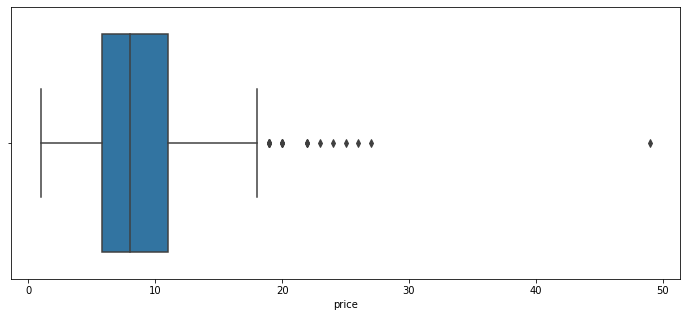

In [286]:
plt.figure(figsize =(12, 5))
sns.boxplot(df['price'])

In [287]:
# 이상치 확인 함수
def find_outlier_by_Tukey(data):
  q1, q3 = np.percentile(data,[25, 75])

  iqr = q3 - q1

  lower_bound = q1 - (iqr * 1.5) # Q1 - (iqr * 1.5)
  upper_bound = q3 + (iqr * 1.5) # Q1 + (iqr * 1.5)

  
  return lower_bound, upper_bound

find_outlier_by_Tukey(df['price'])

(-1.9249999999999998, 18.755)

In [288]:
df[df['price']>19].index

Int64Index([102, 196, 388, 404, 467, 758, 763, 767, 884, 985, 1200, 1287,
            1531],
           dtype='int64')

In [289]:
df[df['price']>19]

,title_orig,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,product_id
102,2020 Men Summer Fashion Brand Summer Suits Cas...,20.0,17,100,1,2.80,15,2.0,3.0,5.0,0.0,5.0,0,0,0,0,"Mens T Shirt,Fashion,Men's Fashion,Sleeve,Summ...",50,Livraison standard,6,0,36,50,CN,lidandanshop,lidandanshop,(67 notes),67,3.298507,5e64b92e00ff3743cf8f3c3d,0,5e9fff5de4df1d32ef2ca70c
196,Women's Fashion Vintage Hollow Out Lace Dress ...,22.0,169,1000,1,3.38,542,195.0,93.0,92.0,49.0,113.0,0,0,0,0,"Summer,Fashion,Lace,Hollow-out,Dress,Mini dres...",50,Livraison standard,5,0,35,50,CN,yuhang081899,yuhang081899,"88 % avis positifs (9,341 notes)",9341,4.147415,5b7ecbfa7956ef54b750df16,0,5c6275876c0cb22f5e6ba570
388,Summer women's cool Wear Casual sport Jogging ...,20.0,17,50,0,4.17,12,7.0,2.0,2.0,0.0,1.0,0,0,0,0,"Summer,Shorts,Sleeve,pants,shortsleeveset,mens...",50,Livraison standard,6,0,36,50,CN,wanghaoshop,wanghaoshop,80 % avis positifs (26 notes),26,3.923077,5e748f2484068a0289ab6f9f,0,5e98015614b1cf44d90910da
404,Water toys row float,24.0,59,1000,1,4.21,762,461.0,150.0,64.0,24.0,63.0,0,0,0,0,"Toy,Inflatable,paddle,the new,water,Equipment,...",50,Livraison standard,6,0,26,50,CN,ruxinggu,ruxinggu,"90 % avis positifs (4,084 notes)",4084,4.308276,59c25e6a30e1f368ea189232,0,5ac1d7201a8c21778e2a2482
467,Palm Angels Sanskrit Short T-shirt Hip Hop Str...,22.0,159,1000,0,4.04,235,127.0,49.0,26.0,7.0,26.0,0,0,0,0,"shorttshirt,Fashion,Shirt,Angel,Summer,Tops,su...",50,Livraison standard,5,0,80,50,CN,liuxiaojun,liuxiaojun,(541 notes),541,4.097967,55e51e53c9f8235d17759948,0,5e573e6360f35b2661fff9dc
758,Summer Women's Fashion Sleeveless V-neck backl...,49.0,42,100,0,4.67,6,4.0,2.0,0.0,0.0,0.0,1,0,0,1,"party,Goth,Plus Size,Summer,Dress,V-neck,bodyc...",2,Livraison Express,12,1,41,2,CN,Yanfeng Living museum,yanfenglivingmuseum,"90 % avis positifs (29,977 notes)",29977,4.223138,5925555b2cd9447854443c41,0,5d09ecc2f5d4eb7721203368
763,5 Color New Summer Women Fashion Spaghetti Str...,23.0,118,100,0,3.86,118,63.0,16.0,16.0,6.0,17.0,0,0,0,0,"Summer,sleeveless,Plus Size,chiffon,chiffon dr...",50,Livraison standard,6,0,54,50,CN,qinjingjing2018,qinjingjing2018,"86 % avis positifs (8,117 notes)",8117,4.064925,5ad4325e9bda4e08bf7fd188,0,5d2fca68d4465c17e6206de7
767,New Fashion Women Solid Color Causal Dialy Dem...,22.0,19,20000,1,3.66,1103,461.0,218.0,170.0,94.0,160.0,0,0,0,0,"Blues,Plus Size,pants,Women jeans,denimromper,...",50,Livraison standard,6,0,38,50,CN,shangjing1012,shangjing1012,"87 % avis positifs (4,107 notes)",4107,4.096908,59df389c88dd76239f03c701,0,5c0a0eab7721f07320bdacd0
884,Summer women's cool Wear Casual sport Jogging ...,20.0,17,50,0,4.17,12,7.0,2.0,2.0,0.0,1.0,0,0,0,0,"Summer,Shorts,Sleeve,pants,shortsleeveset,mens...",50,Livraison standard,6,0,36,50,CN,wanghaoshop,wanghaoshop,80 % avis positifs (26 notes),26,3.923077,5e748f2484068a0289ab6f9f,0,5e98015614b1cf44d90910da
985,2020 Women's Sexy Deep V Neck Dress Backless M...,25.0,38,50,1,3.17,6,2.0,1.0,1.0,0.0,2.0,0,0,0,0,"slim dress,neck dress,Necks,rainbow,Evening Dr...",10,Livraison standard,7,0,27,37,CN,beaufullife2017,beaufullife2017,84 % avis positifs (401 notes),401,4.009975,597ff85721064f2607e253e9,0,5ee4880dad418021a27e3dea


price 이상치를 어떻게 할것인가??
해당 이상치는 human error 가 아니고 자연발생한 것이므로 삭제를 하게되면 충분히 설명이 되지못한다.


1. 제품마다 특징과 상황(시즌, 이벤트등)이 다르니 조사해 보기
2. 동일한 상품임에도 많은 가격차이가 발생한다면 해당 이상치를 제거하는것은 올바르지 않은것 같다. (계절성, 당시 할인판촉 등 이벤트, 시장수요에 따른 가격증감추이)를 분석해 봐야할것 같다. 만약 이런 높은 가격에 영향을 미친 외생 변수가 발견안되고, 이런 경우가 이상치로 없어질 만큼 소수라서, 추론이나 예측을 함에 방해가 심하다면 최후에 없애는 것을 고려 해 볼만하다.
3. 만약 동일한 상품인데 판매자가 다를 경우라면, 판매자가 판매전략일 수 도 있따. 그 경우 판매자를 fixed effect로 잡아볼 수 있따. 만약 판매자가 동일한데, 다른 상품이면 퀄리티가 차이가 나서 가격이 높을수도 있을것 같다.


- 1. 동일상품이고 같은 판매자가 다른전략을 세웠거나 다른 동일상품의 다른 판매자가 판매전략을 다르게 세웠다는 가정하에 살펴보자

In [290]:
# 카피한 데이터프레임이 아닌 제일 처음 데이터를 저장한 로우데이터로 상품의 중복 여부 파악
main_df[main_df['price']>19]['product_id']

102     5e9fff5de4df1d32ef2ca70c
196     5c6275876c0cb22f5e6ba570
388     5e98015614b1cf44d90910da
404     5ac1d7201a8c21778e2a2482
467     5e573e6360f35b2661fff9dc
758     5d09ecc2f5d4eb7721203368
763     5d2fca68d4465c17e6206de7
767     5c0a0eab7721f07320bdacd0
884     5e98015614b1cf44d90910da
985     5ee4880dad418021a27e3dea
1200    5ea0f7839341bb1d6e41ec51
1287    5e9ea540e0c1023c4fd978db
1531    5ed703113547ebad907edbc0
Name: product_id, dtype: object

In [291]:
# duplicated를 활용하여 쉽게 확인하기
main_df[main_df['price']>19]['product_id'].duplicated()

102     False
196     False
388     False
404     False
467     False
758     False
763     False
767     False
884      True
985     False
1200    False
1287    False
1531    False
Name: product_id, dtype: bool

388,884번이 동일한 상품 품목인 것이 확인이 되었다.


In [292]:
main_df[main_df.index==388]

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
388,"Vêtements d'été pour femmes, vêtements de spor...",Summer women's cool Wear Casual sport Jogging ...,20.0,17,EUR,50,0,4.17,12,7.0,2.0,2.0,0.0,1.0,0,0,0,0,"Summer,Shorts,Sleeve,pants,shortsleeveset,mens...",red,S,50,Livraison standard,6,0,36,50,NaN,NaN,CN,wanghaoshop,wanghaoshop,80 % avis positifs (26 notes),26,3.923077,5e748f2484068a0289ab6f9f,0,NaN,https://www.wish.com/c/5e98015614b1cf44d90910da,https://contestimg.wish.com/api/webimage/5e980...,5e98015614b1cf44d90910da,summer,2020-08


In [293]:
main_df[main_df.index==884]

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
884,"Vêtements d'été pour femmes, vêtements de spor...",Summer women's cool Wear Casual sport Jogging ...,20.0,17,EUR,50,0,4.17,12,7.0,2.0,2.0,0.0,1.0,0,0,0,0,"Summer,Shorts,Sleeve,pants,shortsleeveset,mens...",red,S,50,Livraison standard,6,0,36,50,1.0,Quantité limitée !,CN,wanghaoshop,wanghaoshop,80 % avis positifs (26 notes),26,3.923077,5e748f2484068a0289ab6f9f,0,NaN,https://www.wish.com/c/5e98015614b1cf44d90910da,https://contestimg.wish.com/api/webimage/5e980...,5e98015614b1cf44d90910da,summer,2020-08


단순히 중복으로 입력된 값이 것 같다.. 데이터 전체 중복값을 확인해 봐야하므로 다시 전처리 데이터프레임으로 전환한다.

In [294]:
# 중복값 확인
df.duplicated().sum()

220

중복값이 220개나 있는것이 확인되었다.(중복값을 미리 제거해주자..)

In [295]:
df = df.drop_duplicates(keep='first')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1304 entries, 0 to 1572
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title_orig                    1304 non-null   object 
 1   price                         1304 non-null   float64
 2   retail_price                  1304 non-null   int64  
 3   units_sold                    1304 non-null   int64  
 4   uses_ad_boosts                1304 non-null   int64  
 5   rating                        1304 non-null   float64
 6   rating_count                  1304 non-null   int64  
 7   rating_five_count             1304 non-null   float64
 8   rating_four_count             1304 non-null   float64
 9   rating_three_count            1304 non-null   float64
 10  rating_two_count              1304 non-null   float64
 11  rating_one_count              1304 non-null   float64
 12  badges_count                  1304 non-null   int64  
 13  bad

다시 이상치를 들여다 보자.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


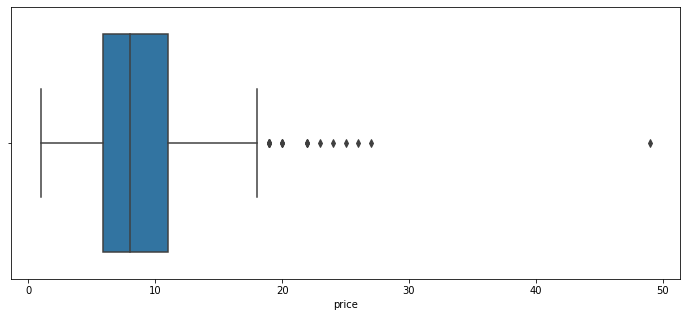

In [296]:
plt.figure(figsize =(12, 5))
sns.boxplot(df['price'])

In [297]:
df[df['price']>19].index

Int64Index([102, 196, 388, 404, 467, 758, 763, 767, 985, 1200, 1287, 1531], dtype='int64')

이상치의 수가 두개는 줄었지만 아직 해결되지않았다

In [298]:
# 같은 상품이 있는지 확인
df[df['price']>19]['title_orig'].duplicated()

102     False
196     False
388     False
404     False
467     False
758     False
763     False
767     False
985     False
1200    False
1287    False
1531    False
Name: title_orig, dtype: bool

남은 경우의 수는 잘못 입력이 되었거나 이벤트나 시장수요에 따른 감경추이 인데 이는 현재 데이터로 확인 할 수 없다.

따라서 해당데이터는 binning이나 Normalize를 해야할거 같다...(왜 해당 문제에 대해서 분석한 사람들은 나와같은 이의를 제기하지 않는걸까?)

In [299]:
# binning을 위해 qcut보다는 cut이 해당 컬럼에 fit이 맞음
pd.qcut(df['price'],6)

0       (12.0, 49.0]
1         (6.0, 8.0]
2         (6.0, 8.0]
3         (6.0, 8.0]
4       (0.999, 5.0]
            ...     
1565    (0.999, 5.0]
1567      (6.0, 8.0]
1568      (5.0, 6.0]
1570    (0.999, 5.0]
1572      (6.0, 8.0]
Name: price, Length: 1304, dtype: category
Categories (6, interval[float64]): [(0.999, 5.0] < (5.0, 6.0] < (6.0, 8.0] < (8.0, 9.0] < (9.0, 12.0] <
                                    (12.0, 49.0]]

In [300]:
# 구간별 데이터 수 확인
pd.qcut(df['price'],6).value_counts()

(6.0, 8.0]      335
(0.999, 5.0]    253
(9.0, 12.0]     240
(5.0, 6.0]      189
(12.0, 49.0]    179
(8.0, 9.0]      108
Name: price, dtype: int64

In [301]:
# 적용해 주기
df['price'] = pd.qcut(df['price'],6)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [302]:
# 카테고리 데이터 인코딩
encoder = LabelEncoder()
df['price'] = encoder.fit_transform(df['price'])
df['price']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0       5
1       2
2       2
3       2
4       0
       ..
1565    0
1567    2
1568    1
1570    0
1572    2
Name: price, Length: 1304, dtype: int64

In [303]:
df

,title_orig,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,product_id
0,2020 Summer Vintage Flamingo Print Pajamas Se...,5,14,100,0,3.76,54,26.0,8.0,10.0,1.0,9.0,0,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",50,Livraison standard,4,0,34,50,CN,zgrdejia,zgrdejia,(568 notes),568,4.128521,595097d6a26f6e070cb878d1,0,5e9ae51d43d6a96e303acdb0
1,Women's Casual Summer Sleeveless Sexy Mini Dress,2,22,20000,1,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0,0,0,0,0,"Mini,womens dresses,Summer,Patchwork,fashion d...",50,Livraison standard,2,0,41,50,CN,SaraHouse,sarahouse,"83 % avis positifs (17,752 notes)",17752,3.899673,56458aa03a698c35c9050988,0,58940d436a0d3d5da4e95a38
2,2020 New Arrival Women Spring and Summer Beach...,2,43,100,0,3.57,14,5.0,4.0,2.0,0.0,3.0,0,0,0,0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",1,Livraison standard,3,0,36,50,CN,hxt520,hxt520,86 % avis positifs (295 notes),295,3.989831,5d464a1ffdf7bc44ee933c65,0,5ea10e2c617580260d55310a
3,Hot Summer Cool T Shirt for Women Fashion Tops...,2,8,5000,1,4.03,579,295.0,119.0,87.0,42.0,36.0,0,0,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...",50,Livraison standard,2,0,41,50,CN,allenfan,allenfan,"(23,832 notes)",23832,4.020435,58cfdefdacb37b556efdff7c,0,5cedf17ad1d44c52c59e4aca
4,Women Summer Shorts Lace Up Elastic Waistband ...,0,3,100,1,3.10,20,6.0,4.0,2.0,2.0,6.0,0,0,0,0,"Summer,Plus Size,Lace,Casual pants,Bottom,pant...",1,Livraison standard,1,0,35,50,CN,youngpeopleshop,happyhorses,"85 % avis positifs (14,482 notes)",14482,4.001588,5ab3b592c3911a095ad5dadb,0,5ebf5819ebac372b070b0e70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1565,New Summer Fashion Trousers Women Leggings Rip...,0,8,100,1,3.79,57,25.0,10.0,13.0,3.0,6.0,0,0,0,0,"Summer,Leggings,Fashion,high waist,pants,slim,...",1,Livraison standard,1,0,41,50,CN,bujizhan,bujizhan,"(4,080 notes)",4080,3.987990,584a7a381591451e4e3af3df,0,5e8f0165e815903d022a3c7c
1567,Sleeveless Solid Color Women Jumpsuit Ladies S...,2,7,20000,1,4.25,3127,1919.0,580.0,304.0,128.0,196.0,1,0,1,0,"bodycon jumpsuits,nightwear,Shorts,slim,Body S...",50,Livraison standard,2,0,44,50,CN,Rell Mail,rellmail,"88 % avis positifs (16,803 notes)",16803,4.155032,56455b13b15aab129db58cb7,0,5c91a7ae7cfe8e4e64c36d97
1568,New Fashion Women Bohemia Dandelion Print Tee ...,1,9,10000,1,4.08,1367,722.0,293.0,185.0,77.0,90.0,0,0,0,0,"bohemia,Plus Size,dandelionfloralprinted,short...",50,Livraison standard,2,0,41,50,CN,cxuelin99126,cxuelin99126,"90 % avis positifs (5,316 notes)",5316,4.224605,5b507899ab577736508a0782,0,5d5fadc99febd9356cbc52ee
1570,New Men Siwmwear Beach-Shorts Men Summer Quick...,0,19,100,0,3.71,59,24.0,15.0,8.0,3.0,9.0,0,0,0,0,"runningshort,Beach Shorts,beachpant,menbeachsh...",15,Livraison standard,2,0,11,50,CN,shixueying,shixueying,86 % avis positifs (210 notes),210,3.961905,5b42da1bf64320209fc8da69,0,5e74be96034d613d42b52dfe


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


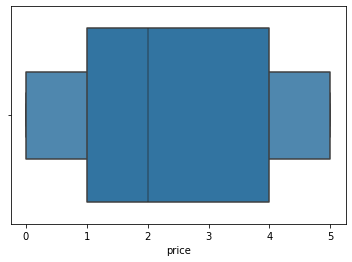

In [304]:
sns.boxenplot(df['price'])

- 2. retail_price 이상치 처리

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


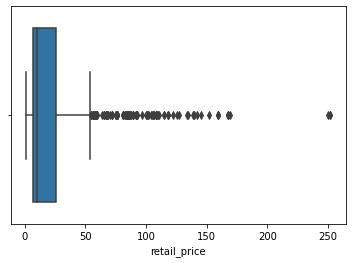

In [305]:
sns.boxplot(df['retail_price'])

In [306]:
df['retail_price'].describe()

count    1304.000000
mean       23.893405
std        30.782780
min         1.000000
25%         7.000000
50%        10.000000
75%        26.000000
max       252.000000
Name: retail_price, dtype: float64

price와 마찬가지로 해당 데이터로 아웃라이어의 처리방법은 binning이 최선이다.

In [307]:
pd.qcut(df['retail_price'],6)

0       (10.0, 17.0]
1       (17.0, 48.0]
2       (17.0, 48.0]
3        (7.0, 10.0]
4       (0.999, 6.0]
            ...     
1565     (7.0, 10.0]
1567      (6.0, 7.0]
1568     (7.0, 10.0]
1570    (17.0, 48.0]
1572    (0.999, 6.0]
Name: retail_price, Length: 1304, dtype: category
Categories (6, interval[float64]): [(0.999, 6.0] < (6.0, 7.0] < (7.0, 10.0] < (10.0, 17.0] <
                                    (17.0, 48.0] < (48.0, 252.0]]

In [308]:
pd.cut(df['retail_price'],6).value_counts()

(0.749, 42.833]       1061
(42.833, 84.667]       168
(84.667, 126.5]         56
(126.5, 168.333]        15
(210.167, 252.0]         3
(168.333, 210.167]       1
Name: retail_price, dtype: int64

In [309]:
df['retail_price'] = pd.qcut(df['retail_price'],6)
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,title_orig,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,product_id
0,2020 Summer Vintage Flamingo Print Pajamas Se...,5,"(10.0, 17.0]",100,0,3.76,54,26.0,8.0,10.0,1.0,9.0,0,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",50,Livraison standard,4,0,34,50,CN,zgrdejia,zgrdejia,(568 notes),568,4.128521,595097d6a26f6e070cb878d1,0,5e9ae51d43d6a96e303acdb0
1,Women's Casual Summer Sleeveless Sexy Mini Dress,2,"(17.0, 48.0]",20000,1,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0,0,0,0,0,"Mini,womens dresses,Summer,Patchwork,fashion d...",50,Livraison standard,2,0,41,50,CN,SaraHouse,sarahouse,"83 % avis positifs (17,752 notes)",17752,3.899673,56458aa03a698c35c9050988,0,58940d436a0d3d5da4e95a38
2,2020 New Arrival Women Spring and Summer Beach...,2,"(17.0, 48.0]",100,0,3.57,14,5.0,4.0,2.0,0.0,3.0,0,0,0,0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",1,Livraison standard,3,0,36,50,CN,hxt520,hxt520,86 % avis positifs (295 notes),295,3.989831,5d464a1ffdf7bc44ee933c65,0,5ea10e2c617580260d55310a
3,Hot Summer Cool T Shirt for Women Fashion Tops...,2,"(7.0, 10.0]",5000,1,4.03,579,295.0,119.0,87.0,42.0,36.0,0,0,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...",50,Livraison standard,2,0,41,50,CN,allenfan,allenfan,"(23,832 notes)",23832,4.020435,58cfdefdacb37b556efdff7c,0,5cedf17ad1d44c52c59e4aca
4,Women Summer Shorts Lace Up Elastic Waistband ...,0,"(0.999, 6.0]",100,1,3.10,20,6.0,4.0,2.0,2.0,6.0,0,0,0,0,"Summer,Plus Size,Lace,Casual pants,Bottom,pant...",1,Livraison standard,1,0,35,50,CN,youngpeopleshop,happyhorses,"85 % avis positifs (14,482 notes)",14482,4.001588,5ab3b592c3911a095ad5dadb,0,5ebf5819ebac372b070b0e70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1565,New Summer Fashion Trousers Women Leggings Rip...,0,"(7.0, 10.0]",100,1,3.79,57,25.0,10.0,13.0,3.0,6.0,0,0,0,0,"Summer,Leggings,Fashion,high waist,pants,slim,...",1,Livraison standard,1,0,41,50,CN,bujizhan,bujizhan,"(4,080 notes)",4080,3.987990,584a7a381591451e4e3af3df,0,5e8f0165e815903d022a3c7c
1567,Sleeveless Solid Color Women Jumpsuit Ladies S...,2,"(6.0, 7.0]",20000,1,4.25,3127,1919.0,580.0,304.0,128.0,196.0,1,0,1,0,"bodycon jumpsuits,nightwear,Shorts,slim,Body S...",50,Livraison standard,2,0,44,50,CN,Rell Mail,rellmail,"88 % avis positifs (16,803 notes)",16803,4.155032,56455b13b15aab129db58cb7,0,5c91a7ae7cfe8e4e64c36d97
1568,New Fashion Women Bohemia Dandelion Print Tee ...,1,"(7.0, 10.0]",10000,1,4.08,1367,722.0,293.0,185.0,77.0,90.0,0,0,0,0,"bohemia,Plus Size,dandelionfloralprinted,short...",50,Livraison standard,2,0,41,50,CN,cxuelin99126,cxuelin99126,"90 % avis positifs (5,316 notes)",5316,4.224605,5b507899ab577736508a0782,0,5d5fadc99febd9356cbc52ee
1570,New Men Siwmwear Beach-Shorts Men Summer Quick...,0,"(17.0, 48.0]",100,0,3.71,59,24.0,15.0,8.0,3.0,9.0,0,0,0,0,"runningshort,Beach Shorts,beachpant,menbeachsh...",15,Livraison standard,2,0,11,50,CN,shixueying,shixueying,86 % avis positifs (210 notes),210,3.961905,5b42da1bf64320209fc8da69,0,5e74be96034d613d42b52dfe


In [310]:
encoder = LabelEncoder()
df['retail_price'] = encoder.fit_transform(df['retail_price'])
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,title_orig,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,product_id
0,2020 Summer Vintage Flamingo Print Pajamas Se...,5,3,100,0,3.76,54,26.0,8.0,10.0,1.0,9.0,0,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",50,Livraison standard,4,0,34,50,CN,zgrdejia,zgrdejia,(568 notes),568,4.128521,595097d6a26f6e070cb878d1,0,5e9ae51d43d6a96e303acdb0
1,Women's Casual Summer Sleeveless Sexy Mini Dress,2,4,20000,1,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0,0,0,0,0,"Mini,womens dresses,Summer,Patchwork,fashion d...",50,Livraison standard,2,0,41,50,CN,SaraHouse,sarahouse,"83 % avis positifs (17,752 notes)",17752,3.899673,56458aa03a698c35c9050988,0,58940d436a0d3d5da4e95a38
2,2020 New Arrival Women Spring and Summer Beach...,2,4,100,0,3.57,14,5.0,4.0,2.0,0.0,3.0,0,0,0,0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",1,Livraison standard,3,0,36,50,CN,hxt520,hxt520,86 % avis positifs (295 notes),295,3.989831,5d464a1ffdf7bc44ee933c65,0,5ea10e2c617580260d55310a
3,Hot Summer Cool T Shirt for Women Fashion Tops...,2,2,5000,1,4.03,579,295.0,119.0,87.0,42.0,36.0,0,0,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...",50,Livraison standard,2,0,41,50,CN,allenfan,allenfan,"(23,832 notes)",23832,4.020435,58cfdefdacb37b556efdff7c,0,5cedf17ad1d44c52c59e4aca
4,Women Summer Shorts Lace Up Elastic Waistband ...,0,0,100,1,3.10,20,6.0,4.0,2.0,2.0,6.0,0,0,0,0,"Summer,Plus Size,Lace,Casual pants,Bottom,pant...",1,Livraison standard,1,0,35,50,CN,youngpeopleshop,happyhorses,"85 % avis positifs (14,482 notes)",14482,4.001588,5ab3b592c3911a095ad5dadb,0,5ebf5819ebac372b070b0e70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1565,New Summer Fashion Trousers Women Leggings Rip...,0,2,100,1,3.79,57,25.0,10.0,13.0,3.0,6.0,0,0,0,0,"Summer,Leggings,Fashion,high waist,pants,slim,...",1,Livraison standard,1,0,41,50,CN,bujizhan,bujizhan,"(4,080 notes)",4080,3.987990,584a7a381591451e4e3af3df,0,5e8f0165e815903d022a3c7c
1567,Sleeveless Solid Color Women Jumpsuit Ladies S...,2,1,20000,1,4.25,3127,1919.0,580.0,304.0,128.0,196.0,1,0,1,0,"bodycon jumpsuits,nightwear,Shorts,slim,Body S...",50,Livraison standard,2,0,44,50,CN,Rell Mail,rellmail,"88 % avis positifs (16,803 notes)",16803,4.155032,56455b13b15aab129db58cb7,0,5c91a7ae7cfe8e4e64c36d97
1568,New Fashion Women Bohemia Dandelion Print Tee ...,1,2,10000,1,4.08,1367,722.0,293.0,185.0,77.0,90.0,0,0,0,0,"bohemia,Plus Size,dandelionfloralprinted,short...",50,Livraison standard,2,0,41,50,CN,cxuelin99126,cxuelin99126,"90 % avis positifs (5,316 notes)",5316,4.224605,5b507899ab577736508a0782,0,5d5fadc99febd9356cbc52ee
1570,New Men Siwmwear Beach-Shorts Men Summer Quick...,0,4,100,0,3.71,59,24.0,15.0,8.0,3.0,9.0,0,0,0,0,"runningshort,Beach Shorts,beachpant,menbeachsh...",15,Livraison standard,2,0,11,50,CN,shixueying,shixueying,86 % avis positifs (210 notes),210,3.961905,5b42da1bf64320209fc8da69,0,5e74be96034d613d42b52dfe


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


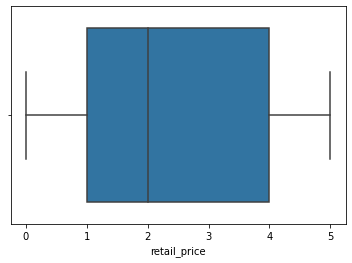

In [311]:
sns.boxplot(df['retail_price'])

- 3. units_sold 이상치 처리

In [312]:
df['units_sold'].value_counts(normalize = True)

100       0.298313
1000      0.276840
5000      0.153374
10000     0.125000
20000     0.075920
50        0.035276
10        0.016104
50000     0.013037
100000    0.004601
7         0.000767
2         0.000767
Name: units_sold, dtype: float64

해당 컬럼은 판매량에 대한 컬럼이다. 이또한 너무 많은 카디널리티를 가지고 있으며 판매량은 중요한 지표이고 하며, 나중에 예측모델의 타겟이 되는 값이다. 따라서 회귀모델로 예측하려고 계획을 세웠으나 이상치 처리방법론중 다른 이진 분류 컬럼으로 대체하는 방법을 사용하고 분류모델로서 변경해 주겠다.


10000장 이상 팔렸을 경우 성공적인 판매 1, 그 미만의 판매량의 경우 성공적이지 못한 판매로 0이라는 값을 주어 binary형태로 변환한다.

In [313]:
# 성공적인 판매 여부 컬럼생성을 위한 데이터 출력
list = []
for i in df['units_sold']:
  if i >= 10000:
    list.append(1)
  elif i < 10000:
    list.append(0)

list

[0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,


In [314]:
# 성공적인 판매 여부 컬럼생성
df['successful_sold'] = list
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,title_orig,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,product_id,successful_sold
0,2020 Summer Vintage Flamingo Print Pajamas Se...,5,3,100,0,3.76,54,26.0,8.0,10.0,1.0,9.0,0,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",50,Livraison standard,4,0,34,50,CN,zgrdejia,zgrdejia,(568 notes),568,4.128521,595097d6a26f6e070cb878d1,0,5e9ae51d43d6a96e303acdb0,0
1,Women's Casual Summer Sleeveless Sexy Mini Dress,2,4,20000,1,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0,0,0,0,0,"Mini,womens dresses,Summer,Patchwork,fashion d...",50,Livraison standard,2,0,41,50,CN,SaraHouse,sarahouse,"83 % avis positifs (17,752 notes)",17752,3.899673,56458aa03a698c35c9050988,0,58940d436a0d3d5da4e95a38,1
2,2020 New Arrival Women Spring and Summer Beach...,2,4,100,0,3.57,14,5.0,4.0,2.0,0.0,3.0,0,0,0,0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",1,Livraison standard,3,0,36,50,CN,hxt520,hxt520,86 % avis positifs (295 notes),295,3.989831,5d464a1ffdf7bc44ee933c65,0,5ea10e2c617580260d55310a,0
3,Hot Summer Cool T Shirt for Women Fashion Tops...,2,2,5000,1,4.03,579,295.0,119.0,87.0,42.0,36.0,0,0,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...",50,Livraison standard,2,0,41,50,CN,allenfan,allenfan,"(23,832 notes)",23832,4.020435,58cfdefdacb37b556efdff7c,0,5cedf17ad1d44c52c59e4aca,0
4,Women Summer Shorts Lace Up Elastic Waistband ...,0,0,100,1,3.10,20,6.0,4.0,2.0,2.0,6.0,0,0,0,0,"Summer,Plus Size,Lace,Casual pants,Bottom,pant...",1,Livraison standard,1,0,35,50,CN,youngpeopleshop,happyhorses,"85 % avis positifs (14,482 notes)",14482,4.001588,5ab3b592c3911a095ad5dadb,0,5ebf5819ebac372b070b0e70,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1565,New Summer Fashion Trousers Women Leggings Rip...,0,2,100,1,3.79,57,25.0,10.0,13.0,3.0,6.0,0,0,0,0,"Summer,Leggings,Fashion,high waist,pants,slim,...",1,Livraison standard,1,0,41,50,CN,bujizhan,bujizhan,"(4,080 notes)",4080,3.987990,584a7a381591451e4e3af3df,0,5e8f0165e815903d022a3c7c,0
1567,Sleeveless Solid Color Women Jumpsuit Ladies S...,2,1,20000,1,4.25,3127,1919.0,580.0,304.0,128.0,196.0,1,0,1,0,"bodycon jumpsuits,nightwear,Shorts,slim,Body S...",50,Livraison standard,2,0,44,50,CN,Rell Mail,rellmail,"88 % avis positifs (16,803 notes)",16803,4.155032,56455b13b15aab129db58cb7,0,5c91a7ae7cfe8e4e64c36d97,1
1568,New Fashion Women Bohemia Dandelion Print Tee ...,1,2,10000,1,4.08,1367,722.0,293.0,185.0,77.0,90.0,0,0,0,0,"bohemia,Plus Size,dandelionfloralprinted,short...",50,Livraison standard,2,0,41,50,CN,cxuelin99126,cxuelin99126,"90 % avis positifs (5,316 notes)",5316,4.224605,5b507899ab577736508a0782,0,5d5fadc99febd9356cbc52ee,1
1570,New Men Siwmwear Beach-Shorts Men Summer Quick...,0,4,100,0,3.71,59,24.0,15.0,8.0,3.0,9.0,0,0,0,0,"runningshort,Beach Shorts,beachpant,menbeachsh...",15,Livraison standard,2,0,11,50,CN,shixueying,shixueying,86 % avis positifs (210 notes),210,3.961905,5b42da1bf64320209fc8da69,0,5e74be96034d613d42b52dfe,0


In [315]:
# succeessful_sold컬럼에 사용된 units_sold컬럼 제거
df = df.drop(columns='units_sold', axis = 1)
df

,title_orig,price,retail_price,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,product_id,successful_sold
0,2020 Summer Vintage Flamingo Print Pajamas Se...,5,3,0,3.76,54,26.0,8.0,10.0,1.0,9.0,0,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",50,Livraison standard,4,0,34,50,CN,zgrdejia,zgrdejia,(568 notes),568,4.128521,595097d6a26f6e070cb878d1,0,5e9ae51d43d6a96e303acdb0,0
1,Women's Casual Summer Sleeveless Sexy Mini Dress,2,4,1,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0,0,0,0,0,"Mini,womens dresses,Summer,Patchwork,fashion d...",50,Livraison standard,2,0,41,50,CN,SaraHouse,sarahouse,"83 % avis positifs (17,752 notes)",17752,3.899673,56458aa03a698c35c9050988,0,58940d436a0d3d5da4e95a38,1
2,2020 New Arrival Women Spring and Summer Beach...,2,4,0,3.57,14,5.0,4.0,2.0,0.0,3.0,0,0,0,0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",1,Livraison standard,3,0,36,50,CN,hxt520,hxt520,86 % avis positifs (295 notes),295,3.989831,5d464a1ffdf7bc44ee933c65,0,5ea10e2c617580260d55310a,0
3,Hot Summer Cool T Shirt for Women Fashion Tops...,2,2,1,4.03,579,295.0,119.0,87.0,42.0,36.0,0,0,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...",50,Livraison standard,2,0,41,50,CN,allenfan,allenfan,"(23,832 notes)",23832,4.020435,58cfdefdacb37b556efdff7c,0,5cedf17ad1d44c52c59e4aca,0
4,Women Summer Shorts Lace Up Elastic Waistband ...,0,0,1,3.10,20,6.0,4.0,2.0,2.0,6.0,0,0,0,0,"Summer,Plus Size,Lace,Casual pants,Bottom,pant...",1,Livraison standard,1,0,35,50,CN,youngpeopleshop,happyhorses,"85 % avis positifs (14,482 notes)",14482,4.001588,5ab3b592c3911a095ad5dadb,0,5ebf5819ebac372b070b0e70,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1565,New Summer Fashion Trousers Women Leggings Rip...,0,2,1,3.79,57,25.0,10.0,13.0,3.0,6.0,0,0,0,0,"Summer,Leggings,Fashion,high waist,pants,slim,...",1,Livraison standard,1,0,41,50,CN,bujizhan,bujizhan,"(4,080 notes)",4080,3.987990,584a7a381591451e4e3af3df,0,5e8f0165e815903d022a3c7c,0
1567,Sleeveless Solid Color Women Jumpsuit Ladies S...,2,1,1,4.25,3127,1919.0,580.0,304.0,128.0,196.0,1,0,1,0,"bodycon jumpsuits,nightwear,Shorts,slim,Body S...",50,Livraison standard,2,0,44,50,CN,Rell Mail,rellmail,"88 % avis positifs (16,803 notes)",16803,4.155032,56455b13b15aab129db58cb7,0,5c91a7ae7cfe8e4e64c36d97,1
1568,New Fashion Women Bohemia Dandelion Print Tee ...,1,2,1,4.08,1367,722.0,293.0,185.0,77.0,90.0,0,0,0,0,"bohemia,Plus Size,dandelionfloralprinted,short...",50,Livraison standard,2,0,41,50,CN,cxuelin99126,cxuelin99126,"90 % avis positifs (5,316 notes)",5316,4.224605,5b507899ab577736508a0782,0,5d5fadc99febd9356cbc52ee,1
1570,New Men Siwmwear Beach-Shorts Men Summer Quick...,0,4,0,3.71,59,24.0,15.0,8.0,3.0,9.0,0,0,0,0,"runningshort,Beach Shorts,beachpant,menbeachsh...",15,Livraison standard,2,0,11,50,CN,shixueying,shixueying,86 % avis positifs (210 notes),210,3.961905,5b42da1bf64320209fc8da69,0,5e74be96034d613d42b52dfe,0


- 4. 평가등급 이상치 처리

해당 컬럼역시 이상치가 어마무시하다...이런걸 다 그냥 binning하는게 맞는것인가?? 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


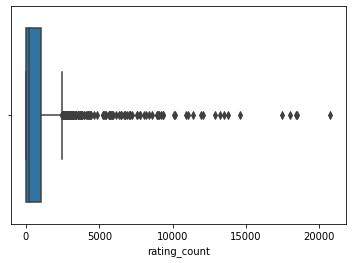

In [316]:
sns.boxplot(df['rating_count'])

In [317]:
df['rating_count'].describe()

count     1304.000000
mean      1009.204755
std       2116.700632
min          1.000000
25%         36.000000
50%        220.500000
75%        998.250000
max      20744.000000
Name: rating_count, dtype: float64

상품의 전체 평가등급의 평균인 rating은 지울 수 없으며 개개의 고객이 5개의 등급중 어떤것을 선택했는지 여부는 평균과 rating을 누른 총 개수로 충분히 유의미한 결과를 낼 수 있을것이라고 판단해서 rating과 rating_count만 남기고 각각의 등급별 rating은 삭제해 준다.

In [318]:
df= df.drop(columns = ['rating_five_count', 'rating_four_count', 'rating_three_count', 'rating_two_count', 'rating_one_count'])
df

,title_orig,price,retail_price,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,product_id,successful_sold
0,2020 Summer Vintage Flamingo Print Pajamas Se...,5,3,0,3.76,54,0,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",50,Livraison standard,4,0,34,50,CN,zgrdejia,zgrdejia,(568 notes),568,4.128521,595097d6a26f6e070cb878d1,0,5e9ae51d43d6a96e303acdb0,0
1,Women's Casual Summer Sleeveless Sexy Mini Dress,2,4,1,3.45,6135,0,0,0,0,"Mini,womens dresses,Summer,Patchwork,fashion d...",50,Livraison standard,2,0,41,50,CN,SaraHouse,sarahouse,"83 % avis positifs (17,752 notes)",17752,3.899673,56458aa03a698c35c9050988,0,58940d436a0d3d5da4e95a38,1
2,2020 New Arrival Women Spring and Summer Beach...,2,4,0,3.57,14,0,0,0,0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",1,Livraison standard,3,0,36,50,CN,hxt520,hxt520,86 % avis positifs (295 notes),295,3.989831,5d464a1ffdf7bc44ee933c65,0,5ea10e2c617580260d55310a,0
3,Hot Summer Cool T Shirt for Women Fashion Tops...,2,2,1,4.03,579,0,0,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...",50,Livraison standard,2,0,41,50,CN,allenfan,allenfan,"(23,832 notes)",23832,4.020435,58cfdefdacb37b556efdff7c,0,5cedf17ad1d44c52c59e4aca,0
4,Women Summer Shorts Lace Up Elastic Waistband ...,0,0,1,3.10,20,0,0,0,0,"Summer,Plus Size,Lace,Casual pants,Bottom,pant...",1,Livraison standard,1,0,35,50,CN,youngpeopleshop,happyhorses,"85 % avis positifs (14,482 notes)",14482,4.001588,5ab3b592c3911a095ad5dadb,0,5ebf5819ebac372b070b0e70,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1565,New Summer Fashion Trousers Women Leggings Rip...,0,2,1,3.79,57,0,0,0,0,"Summer,Leggings,Fashion,high waist,pants,slim,...",1,Livraison standard,1,0,41,50,CN,bujizhan,bujizhan,"(4,080 notes)",4080,3.987990,584a7a381591451e4e3af3df,0,5e8f0165e815903d022a3c7c,0
1567,Sleeveless Solid Color Women Jumpsuit Ladies S...,2,1,1,4.25,3127,1,0,1,0,"bodycon jumpsuits,nightwear,Shorts,slim,Body S...",50,Livraison standard,2,0,44,50,CN,Rell Mail,rellmail,"88 % avis positifs (16,803 notes)",16803,4.155032,56455b13b15aab129db58cb7,0,5c91a7ae7cfe8e4e64c36d97,1
1568,New Fashion Women Bohemia Dandelion Print Tee ...,1,2,1,4.08,1367,0,0,0,0,"bohemia,Plus Size,dandelionfloralprinted,short...",50,Livraison standard,2,0,41,50,CN,cxuelin99126,cxuelin99126,"90 % avis positifs (5,316 notes)",5316,4.224605,5b507899ab577736508a0782,0,5d5fadc99febd9356cbc52ee,1
1570,New Men Siwmwear Beach-Shorts Men Summer Quick...,0,4,0,3.71,59,0,0,0,0,"runningshort,Beach Shorts,beachpant,menbeachsh...",15,Livraison standard,2,0,11,50,CN,shixueying,shixueying,86 % avis positifs (210 notes),210,3.961905,5b42da1bf64320209fc8da69,0,5e74be96034d613d42b52dfe,0


rating_count의 경우도 이상치를 제거하기 위해 변경해 준다.

평가등급 수 가 220개 보다 작으면 그저그렇다, 1000개 보다 작을경우 좋다, 그 이상일 경우 

In [319]:
# raing_count 변환 데이터 준비
list_count =[]
for i in df['rating_count']:
  if i < 220:
    list_count.append(0)
  elif (i >= 220) & (i < 1000):
    list_count.append(1)
  elif i >= 1000:
    list_count.append(2)

In [320]:
# 인기 정도의 컬럼으로 바꾸고 위에서 준비한 데이터 넣어주기
df['rating_count'] = list_count
df = df.rename(columns={'rating_count' : 'popular'})
df

,title_orig,price,retail_price,uses_ad_boosts,rating,popular,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,product_id,successful_sold
0,2020 Summer Vintage Flamingo Print Pajamas Se...,5,3,0,3.76,0,0,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",50,Livraison standard,4,0,34,50,CN,zgrdejia,zgrdejia,(568 notes),568,4.128521,595097d6a26f6e070cb878d1,0,5e9ae51d43d6a96e303acdb0,0
1,Women's Casual Summer Sleeveless Sexy Mini Dress,2,4,1,3.45,2,0,0,0,0,"Mini,womens dresses,Summer,Patchwork,fashion d...",50,Livraison standard,2,0,41,50,CN,SaraHouse,sarahouse,"83 % avis positifs (17,752 notes)",17752,3.899673,56458aa03a698c35c9050988,0,58940d436a0d3d5da4e95a38,1
2,2020 New Arrival Women Spring and Summer Beach...,2,4,0,3.57,0,0,0,0,0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",1,Livraison standard,3,0,36,50,CN,hxt520,hxt520,86 % avis positifs (295 notes),295,3.989831,5d464a1ffdf7bc44ee933c65,0,5ea10e2c617580260d55310a,0
3,Hot Summer Cool T Shirt for Women Fashion Tops...,2,2,1,4.03,1,0,0,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...",50,Livraison standard,2,0,41,50,CN,allenfan,allenfan,"(23,832 notes)",23832,4.020435,58cfdefdacb37b556efdff7c,0,5cedf17ad1d44c52c59e4aca,0
4,Women Summer Shorts Lace Up Elastic Waistband ...,0,0,1,3.10,0,0,0,0,0,"Summer,Plus Size,Lace,Casual pants,Bottom,pant...",1,Livraison standard,1,0,35,50,CN,youngpeopleshop,happyhorses,"85 % avis positifs (14,482 notes)",14482,4.001588,5ab3b592c3911a095ad5dadb,0,5ebf5819ebac372b070b0e70,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1565,New Summer Fashion Trousers Women Leggings Rip...,0,2,1,3.79,0,0,0,0,0,"Summer,Leggings,Fashion,high waist,pants,slim,...",1,Livraison standard,1,0,41,50,CN,bujizhan,bujizhan,"(4,080 notes)",4080,3.987990,584a7a381591451e4e3af3df,0,5e8f0165e815903d022a3c7c,0
1567,Sleeveless Solid Color Women Jumpsuit Ladies S...,2,1,1,4.25,2,1,0,1,0,"bodycon jumpsuits,nightwear,Shorts,slim,Body S...",50,Livraison standard,2,0,44,50,CN,Rell Mail,rellmail,"88 % avis positifs (16,803 notes)",16803,4.155032,56455b13b15aab129db58cb7,0,5c91a7ae7cfe8e4e64c36d97,1
1568,New Fashion Women Bohemia Dandelion Print Tee ...,1,2,1,4.08,2,0,0,0,0,"bohemia,Plus Size,dandelionfloralprinted,short...",50,Livraison standard,2,0,41,50,CN,cxuelin99126,cxuelin99126,"90 % avis positifs (5,316 notes)",5316,4.224605,5b507899ab577736508a0782,0,5d5fadc99febd9356cbc52ee,1
1570,New Men Siwmwear Beach-Shorts Men Summer Quick...,0,4,0,3.71,0,0,0,0,0,"runningshort,Beach Shorts,beachpant,menbeachsh...",15,Livraison standard,2,0,11,50,CN,shixueying,shixueying,86 % avis positifs (210 notes),210,3.961905,5b42da1bf64320209fc8da69,0,5e74be96034d613d42b52dfe,0


In [321]:
# 0은 그저그런 인기, 1은 인기 있는 제품, 2는 매우 인기있는 제품
df['popular'].unique()

array([0, 2, 1])

In [322]:
df['badges_count'].unique()

array([0, 1, 2, 3])

중간 점검 및 필요없는 컬럼 정리

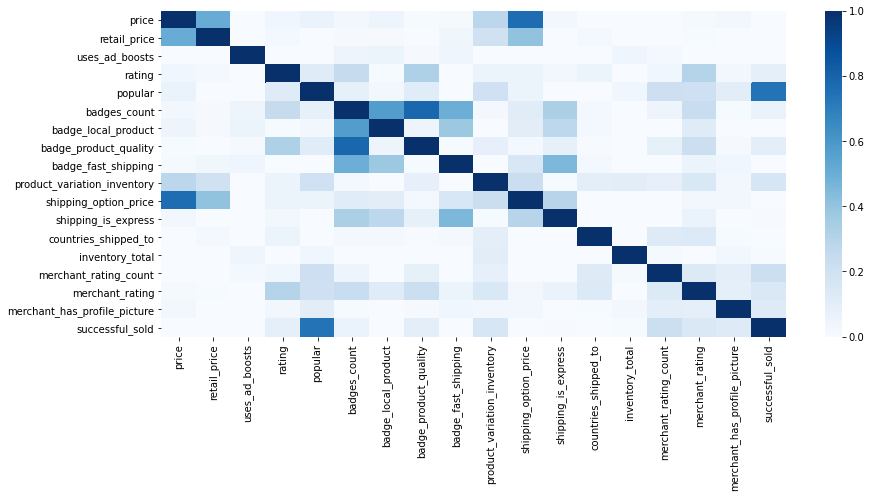

In [323]:
# 중간점검 히트맵
plt.figure(figsize = (14, 6))
sns.heatmap(df.corr(), vmin = 0, vmax = 1, cmap = 'Blues')

- 뱃지의 총 갯수는 뱃지종류들이 따로 있으며 각각 다른성격 이므로 총갯수로는 의미가 없어 제외시키며, 

- local_product의 뱃지경우 배송과 연관이 있기때문에 뒤에 있는 빠른배송 뱃지와 겹치게 된다. 만약 local_product가 다른것에 영향을 준다면 가지고 가야하지만 배송이외의 장점을 보이지 않고 있다. 이는 따로 지역상품에 대한 분석시 사용할 수 있기때문에 제외시킨다. 

- 그리고 남은 두개의 뱃지는 상품의 질은 중요한 요소이며 배송이 빠른것 또한 중요한 
요인으로 작용할 수 있다. 하지만 뒤에 나오는 shipping_is_express라는 배송 급행 여부 컬럼과 빠른 배송 뱃지가 겹치게 된다. 하지만 급행과 빠른 배송은 또 약간의 차이가 있다 생각하여 살려두기로 했다.


In [324]:
df= df.drop(columns=['badges_count','badge_local_product'], axis = 1)
df

,title_orig,price,retail_price,uses_ad_boosts,rating,popular,badge_product_quality,badge_fast_shipping,tags,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,product_id,successful_sold
0,2020 Summer Vintage Flamingo Print Pajamas Se...,5,3,0,3.76,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",50,Livraison standard,4,0,34,50,CN,zgrdejia,zgrdejia,(568 notes),568,4.128521,595097d6a26f6e070cb878d1,0,5e9ae51d43d6a96e303acdb0,0
1,Women's Casual Summer Sleeveless Sexy Mini Dress,2,4,1,3.45,2,0,0,"Mini,womens dresses,Summer,Patchwork,fashion d...",50,Livraison standard,2,0,41,50,CN,SaraHouse,sarahouse,"83 % avis positifs (17,752 notes)",17752,3.899673,56458aa03a698c35c9050988,0,58940d436a0d3d5da4e95a38,1
2,2020 New Arrival Women Spring and Summer Beach...,2,4,0,3.57,0,0,0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",1,Livraison standard,3,0,36,50,CN,hxt520,hxt520,86 % avis positifs (295 notes),295,3.989831,5d464a1ffdf7bc44ee933c65,0,5ea10e2c617580260d55310a,0
3,Hot Summer Cool T Shirt for Women Fashion Tops...,2,2,1,4.03,1,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...",50,Livraison standard,2,0,41,50,CN,allenfan,allenfan,"(23,832 notes)",23832,4.020435,58cfdefdacb37b556efdff7c,0,5cedf17ad1d44c52c59e4aca,0
4,Women Summer Shorts Lace Up Elastic Waistband ...,0,0,1,3.10,0,0,0,"Summer,Plus Size,Lace,Casual pants,Bottom,pant...",1,Livraison standard,1,0,35,50,CN,youngpeopleshop,happyhorses,"85 % avis positifs (14,482 notes)",14482,4.001588,5ab3b592c3911a095ad5dadb,0,5ebf5819ebac372b070b0e70,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1565,New Summer Fashion Trousers Women Leggings Rip...,0,2,1,3.79,0,0,0,"Summer,Leggings,Fashion,high waist,pants,slim,...",1,Livraison standard,1,0,41,50,CN,bujizhan,bujizhan,"(4,080 notes)",4080,3.987990,584a7a381591451e4e3af3df,0,5e8f0165e815903d022a3c7c,0
1567,Sleeveless Solid Color Women Jumpsuit Ladies S...,2,1,1,4.25,2,1,0,"bodycon jumpsuits,nightwear,Shorts,slim,Body S...",50,Livraison standard,2,0,44,50,CN,Rell Mail,rellmail,"88 % avis positifs (16,803 notes)",16803,4.155032,56455b13b15aab129db58cb7,0,5c91a7ae7cfe8e4e64c36d97,1
1568,New Fashion Women Bohemia Dandelion Print Tee ...,1,2,1,4.08,2,0,0,"bohemia,Plus Size,dandelionfloralprinted,short...",50,Livraison standard,2,0,41,50,CN,cxuelin99126,cxuelin99126,"90 % avis positifs (5,316 notes)",5316,4.224605,5b507899ab577736508a0782,0,5d5fadc99febd9356cbc52ee,1
1570,New Men Siwmwear Beach-Shorts Men Summer Quick...,0,4,0,3.71,0,0,0,"runningshort,Beach Shorts,beachpant,menbeachsh...",15,Livraison standard,2,0,11,50,CN,shixueying,shixueying,86 % avis positifs (210 notes),210,3.961905,5b42da1bf64320209fc8da69,0,5e74be96034d613d42b52dfe,0


- 5. 판매자의 변경가능한 최대 허용 수량 이상치 처리

In [325]:
df['product_variation_inventory'].unique()

array([50,  1,  2,  7, 11, 19,  5, 10,  4, 37, 49, 17,  6, 45, 44,  3, 36,
       20,  9, 18,  8, 27, 12, 25, 30, 34, 46, 21, 15, 13, 22, 47, 29, 43,
       24, 48, 16, 38, 35, 14, 39, 41, 31, 28, 23, 26, 33, 40])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


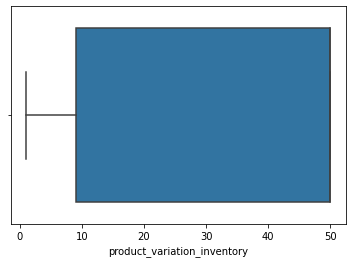

In [326]:
sns.boxplot(df['product_variation_inventory'])

In [327]:
df['product_variation_inventory'].describe()

count    1304.000000
mean       34.025307
std        20.979875
min         1.000000
25%         9.000000
50%        50.000000
75%        50.000000
max        50.000000
Name: product_variation_inventory, dtype: float64

절반이50개의 최대 변경가능한 허용수량을 가지고 있으므로 50개를기준으로 0과 1로 분류하여 허용수량이 많다, 적다를 구분하는 컬럼으로 변경하겠습니다.


In [328]:
# 바이너리 데이터로 전환
list_inventory = []
for i in df['product_variation_inventory']:
  if i < 50:
    list_inventory.append(0)
  elif i >= 50:
    list_inventory.append(1)    

In [329]:
df['product_variation_inventory'] = list_inventory
df['product_variation_inventory'] 

0       1
1       1
2       0
3       1
4       0
       ..
1565    0
1567    1
1568    1
1570    0
1572    1
Name: product_variation_inventory, Length: 1304, dtype: int64

In [330]:
df['countries_shipped_to'].describe()

count    1304.000000
mean       40.641871
std        19.963931
min         6.000000
25%        32.000000
50%        40.000000
75%        43.000000
max       140.000000
Name: countries_shipped_to, dtype: float64

그런데 이렇게 50%로 이진 분류하는것이 맞는걸까??

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


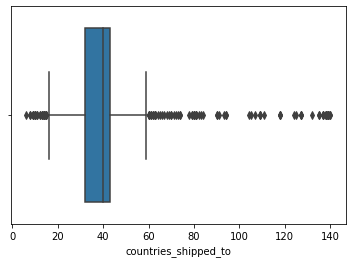

In [331]:
sns.boxplot(df['countries_shipped_to'])

아래쪽 아웃라이어와 위쪽 아웃라이어 그리고 아웃라이어가 아닌 것 이렇게 3가지로 나누어서 만들어 보자

25% - std, 75% + std를 각각 아웃라이서 수치

In [332]:
list_countries =[]
for i in df['countries_shipped_to']:
  if i < 13:
    list_countries.append(0)
  elif (i >= 13) & (i < 62):
    list_countries.append(1)
  elif i >= 62:
    list_countries.append(2)

In [333]:
df['countries_shipped_to'] = list_countries
df['countries_shipped_to']

0       1
1       1
2       1
3       1
4       1
       ..
1565    1
1567    1
1568    1
1570    0
1572    1
Name: countries_shipped_to, Length: 1304, dtype: int64

In [334]:
df['countries_shipped_to'].unique()

array([1, 2, 0])

- 6. 모든 제품 변형에 대한 총 재고(크기/ 생상 변형) 이상치 처리

위에서 한 inventory관련 컬럼과 중복이 되므로 이상치 처리를 할필요 없이 삭제해 준다.

In [335]:
df =df.drop(columns ='inventory_total', axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1304 entries, 0 to 1572
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title_orig                    1304 non-null   object 
 1   price                         1304 non-null   int64  
 2   retail_price                  1304 non-null   int64  
 3   uses_ad_boosts                1304 non-null   int64  
 4   rating                        1304 non-null   float64
 5   popular                       1304 non-null   int64  
 6   badge_product_quality         1304 non-null   int64  
 7   badge_fast_shipping           1304 non-null   int64  
 8   tags                          1304 non-null   object 
 9   product_variation_inventory   1304 non-null   int64  
 10  shipping_option_name          1304 non-null   object 
 11  shipping_option_price         1304 non-null   int64  
 12  shipping_is_express           1304 non-null   int64  
 13  cou

- 7. 판매자의 평가 수 이상치 처리

판매자의 평가의 경우 상품의 평가와 비슷하기도 하고 판매자의 rating이 따로 있기때문에 삭제해줘도 괜찮을거 같다.

In [336]:
df= df.drop(columns = 'merchant_rating_count', axis =1)
df

,title_orig,price,retail_price,uses_ad_boosts,rating,popular,badge_product_quality,badge_fast_shipping,tags,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating,merchant_id,merchant_has_profile_picture,product_id,successful_sold
0,2020 Summer Vintage Flamingo Print Pajamas Se...,5,3,0,3.76,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",1,Livraison standard,4,0,1,CN,zgrdejia,zgrdejia,(568 notes),4.128521,595097d6a26f6e070cb878d1,0,5e9ae51d43d6a96e303acdb0,0
1,Women's Casual Summer Sleeveless Sexy Mini Dress,2,4,1,3.45,2,0,0,"Mini,womens dresses,Summer,Patchwork,fashion d...",1,Livraison standard,2,0,1,CN,SaraHouse,sarahouse,"83 % avis positifs (17,752 notes)",3.899673,56458aa03a698c35c9050988,0,58940d436a0d3d5da4e95a38,1
2,2020 New Arrival Women Spring and Summer Beach...,2,4,0,3.57,0,0,0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",0,Livraison standard,3,0,1,CN,hxt520,hxt520,86 % avis positifs (295 notes),3.989831,5d464a1ffdf7bc44ee933c65,0,5ea10e2c617580260d55310a,0
3,Hot Summer Cool T Shirt for Women Fashion Tops...,2,2,1,4.03,1,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...",1,Livraison standard,2,0,1,CN,allenfan,allenfan,"(23,832 notes)",4.020435,58cfdefdacb37b556efdff7c,0,5cedf17ad1d44c52c59e4aca,0
4,Women Summer Shorts Lace Up Elastic Waistband ...,0,0,1,3.10,0,0,0,"Summer,Plus Size,Lace,Casual pants,Bottom,pant...",0,Livraison standard,1,0,1,CN,youngpeopleshop,happyhorses,"85 % avis positifs (14,482 notes)",4.001588,5ab3b592c3911a095ad5dadb,0,5ebf5819ebac372b070b0e70,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1565,New Summer Fashion Trousers Women Leggings Rip...,0,2,1,3.79,0,0,0,"Summer,Leggings,Fashion,high waist,pants,slim,...",0,Livraison standard,1,0,1,CN,bujizhan,bujizhan,"(4,080 notes)",3.987990,584a7a381591451e4e3af3df,0,5e8f0165e815903d022a3c7c,0
1567,Sleeveless Solid Color Women Jumpsuit Ladies S...,2,1,1,4.25,2,1,0,"bodycon jumpsuits,nightwear,Shorts,slim,Body S...",1,Livraison standard,2,0,1,CN,Rell Mail,rellmail,"88 % avis positifs (16,803 notes)",4.155032,56455b13b15aab129db58cb7,0,5c91a7ae7cfe8e4e64c36d97,1
1568,New Fashion Women Bohemia Dandelion Print Tee ...,1,2,1,4.08,2,0,0,"bohemia,Plus Size,dandelionfloralprinted,short...",1,Livraison standard,2,0,1,CN,cxuelin99126,cxuelin99126,"90 % avis positifs (5,316 notes)",4.224605,5b507899ab577736508a0782,0,5d5fadc99febd9356cbc52ee,1
1570,New Men Siwmwear Beach-Shorts Men Summer Quick...,0,4,0,3.71,0,0,0,"runningshort,Beach Shorts,beachpant,menbeachsh...",0,Livraison standard,2,0,0,CN,shixueying,shixueying,86 % avis positifs (210 notes),3.961905,5b42da1bf64320209fc8da69,0,5e74be96034d613d42b52dfe,0


## 기타 전처리 하기

추가적으로 필요없는 컬럼들 삭제하기

In [337]:
df

,title_orig,price,retail_price,uses_ad_boosts,rating,popular,badge_product_quality,badge_fast_shipping,tags,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating,merchant_id,merchant_has_profile_picture,product_id,successful_sold
0,2020 Summer Vintage Flamingo Print Pajamas Se...,5,3,0,3.76,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",1,Livraison standard,4,0,1,CN,zgrdejia,zgrdejia,(568 notes),4.128521,595097d6a26f6e070cb878d1,0,5e9ae51d43d6a96e303acdb0,0
1,Women's Casual Summer Sleeveless Sexy Mini Dress,2,4,1,3.45,2,0,0,"Mini,womens dresses,Summer,Patchwork,fashion d...",1,Livraison standard,2,0,1,CN,SaraHouse,sarahouse,"83 % avis positifs (17,752 notes)",3.899673,56458aa03a698c35c9050988,0,58940d436a0d3d5da4e95a38,1
2,2020 New Arrival Women Spring and Summer Beach...,2,4,0,3.57,0,0,0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",0,Livraison standard,3,0,1,CN,hxt520,hxt520,86 % avis positifs (295 notes),3.989831,5d464a1ffdf7bc44ee933c65,0,5ea10e2c617580260d55310a,0
3,Hot Summer Cool T Shirt for Women Fashion Tops...,2,2,1,4.03,1,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...",1,Livraison standard,2,0,1,CN,allenfan,allenfan,"(23,832 notes)",4.020435,58cfdefdacb37b556efdff7c,0,5cedf17ad1d44c52c59e4aca,0
4,Women Summer Shorts Lace Up Elastic Waistband ...,0,0,1,3.10,0,0,0,"Summer,Plus Size,Lace,Casual pants,Bottom,pant...",0,Livraison standard,1,0,1,CN,youngpeopleshop,happyhorses,"85 % avis positifs (14,482 notes)",4.001588,5ab3b592c3911a095ad5dadb,0,5ebf5819ebac372b070b0e70,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1565,New Summer Fashion Trousers Women Leggings Rip...,0,2,1,3.79,0,0,0,"Summer,Leggings,Fashion,high waist,pants,slim,...",0,Livraison standard,1,0,1,CN,bujizhan,bujizhan,"(4,080 notes)",3.987990,584a7a381591451e4e3af3df,0,5e8f0165e815903d022a3c7c,0
1567,Sleeveless Solid Color Women Jumpsuit Ladies S...,2,1,1,4.25,2,1,0,"bodycon jumpsuits,nightwear,Shorts,slim,Body S...",1,Livraison standard,2,0,1,CN,Rell Mail,rellmail,"88 % avis positifs (16,803 notes)",4.155032,56455b13b15aab129db58cb7,0,5c91a7ae7cfe8e4e64c36d97,1
1568,New Fashion Women Bohemia Dandelion Print Tee ...,1,2,1,4.08,2,0,0,"bohemia,Plus Size,dandelionfloralprinted,short...",1,Livraison standard,2,0,1,CN,cxuelin99126,cxuelin99126,"90 % avis positifs (5,316 notes)",4.224605,5b507899ab577736508a0782,0,5d5fadc99febd9356cbc52ee,1
1570,New Men Siwmwear Beach-Shorts Men Summer Quick...,0,4,0,3.71,0,0,0,"runningshort,Beach Shorts,beachpant,menbeachsh...",0,Livraison standard,2,0,0,CN,shixueying,shixueying,86 % avis positifs (210 notes),3.961905,5b42da1bf64320209fc8da69,0,5e74be96034d613d42b52dfe,0


- 상품명 역시 현재 텍스트 처리가 불가능하며, tags가 있기때문에 tags컬럼으로 데이터를 탐색하고자 한다.
- 배송옵션은 전부 표준배송이기때문에 삭제해준다.
- 판매자 타이틀은 판매자 이름이 있기때문에 삭제해 준다.

- 판매자 정보 섹션에 사용자에게 표시되는 자막텍스트 또한 필요없으므로 삭제해 준다.

- 판매의 아이디는 판매자의 이름이 있기 때문에 삭제해 준다.

In [338]:
df= df.drop(columns = ['title_orig', 'shipping_option_name', 'merchant_title', 'merchant_info_subtitle','merchant_id' ],axis = 1)
df

,price,retail_price,uses_ad_boosts,rating,popular,badge_product_quality,badge_fast_shipping,tags,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,origin_country,merchant_name,merchant_rating,merchant_has_profile_picture,product_id,successful_sold
0,5,3,0,3.76,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",1,4,0,1,CN,zgrdejia,4.128521,0,5e9ae51d43d6a96e303acdb0,0
1,2,4,1,3.45,2,0,0,"Mini,womens dresses,Summer,Patchwork,fashion d...",1,2,0,1,CN,sarahouse,3.899673,0,58940d436a0d3d5da4e95a38,1
2,2,4,0,3.57,0,0,0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",0,3,0,1,CN,hxt520,3.989831,0,5ea10e2c617580260d55310a,0
3,2,2,1,4.03,1,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...",1,2,0,1,CN,allenfan,4.020435,0,5cedf17ad1d44c52c59e4aca,0
4,0,0,1,3.10,0,0,0,"Summer,Plus Size,Lace,Casual pants,Bottom,pant...",0,1,0,1,CN,happyhorses,4.001588,0,5ebf5819ebac372b070b0e70,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1565,0,2,1,3.79,0,0,0,"Summer,Leggings,Fashion,high waist,pants,slim,...",0,1,0,1,CN,bujizhan,3.987990,0,5e8f0165e815903d022a3c7c,0
1567,2,1,1,4.25,2,1,0,"bodycon jumpsuits,nightwear,Shorts,slim,Body S...",1,2,0,1,CN,rellmail,4.155032,0,5c91a7ae7cfe8e4e64c36d97,1
1568,1,2,1,4.08,2,0,0,"bohemia,Plus Size,dandelionfloralprinted,short...",1,2,0,1,CN,cxuelin99126,4.224605,0,5d5fadc99febd9356cbc52ee,1
1570,0,4,0,3.71,0,0,0,"runningshort,Beach Shorts,beachpant,menbeachsh...",0,2,0,0,CN,shixueying,3.961905,0,5e74be96034d613d42b52dfe,0


In [339]:
# 소수점 전처리(소수점 첫째자리 까지)
df['rating'] = df['rating'].round(1)
df['merchant_rating'] = df['merchant_rating'].round(1)

- 원산지 전처리

In [340]:
df['origin_country'].value_counts()

CN    1271
US      27
VE       3
SG       2
GB       1
Name: origin_country, dtype: int64

In [343]:
origin_list = []
for i in df['origin_country']:
  if i == 'CN':
    origin_list.append(1) 
  elif i != 'CN':
    origin_list.append(0)  

In [345]:
df['origin_country'] = origin_list

In [346]:
df['origin_country'].value_counts()

1    1271
0      33
Name: origin_country, dtype: int64

In [348]:
df =df.rename(columns= {'origin_country': 'origin_china'})
df

,price,retail_price,uses_ad_boosts,rating,popular,badge_product_quality,badge_fast_shipping,tags,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,origin_china,merchant_name,merchant_rating,merchant_has_profile_picture,product_id,successful_sold
0,5,3,0,3.8,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",1,4,0,1,1,zgrdejia,4.1,0,5e9ae51d43d6a96e303acdb0,0
1,2,4,1,3.4,2,0,0,"Mini,womens dresses,Summer,Patchwork,fashion d...",1,2,0,1,1,sarahouse,3.9,0,58940d436a0d3d5da4e95a38,1
2,2,4,0,3.6,0,0,0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",0,3,0,1,1,hxt520,4.0,0,5ea10e2c617580260d55310a,0
3,2,2,1,4.0,1,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...",1,2,0,1,1,allenfan,4.0,0,5cedf17ad1d44c52c59e4aca,0
4,0,0,1,3.1,0,0,0,"Summer,Plus Size,Lace,Casual pants,Bottom,pant...",0,1,0,1,1,happyhorses,4.0,0,5ebf5819ebac372b070b0e70,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1565,0,2,1,3.8,0,0,0,"Summer,Leggings,Fashion,high waist,pants,slim,...",0,1,0,1,1,bujizhan,4.0,0,5e8f0165e815903d022a3c7c,0
1567,2,1,1,4.2,2,1,0,"bodycon jumpsuits,nightwear,Shorts,slim,Body S...",1,2,0,1,1,rellmail,4.2,0,5c91a7ae7cfe8e4e64c36d97,1
1568,1,2,1,4.1,2,0,0,"bohemia,Plus Size,dandelionfloralprinted,short...",1,2,0,1,1,cxuelin99126,4.2,0,5d5fadc99febd9356cbc52ee,1
1570,0,4,0,3.7,0,0,0,"runningshort,Beach Shorts,beachpant,menbeachsh...",0,2,0,0,1,shixueying,4.0,0,5e74be96034d613d42b52dfe,0
